# Telecom Churn -  Case Study


## Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

## Business Objective

The dataset contains customer-level information for a span of four consecutive months - June, July, August & September. The months are encoded as 6, 7, 8 and 9, respectively. The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

## Analysis Process
The analysis is divided into nine main parts:
> 1. Data Sourcing or Data Understanding
2. Data cleaning and Derived Metrics
3. Exploratory Data Analysis (Univariate, Bivariate Analysis)
4. Model Preparation
     - Train and Test Data Split
     - Data Normalization
     - Handling Class Imbalance
5. Model Building
6. Residual Analysis of the Train Data
7. Making Predictions
8. Model Evaluation
9. Final Inference

### Import Libraries

In [130]:
# Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')
from lightgbm import LGBMClassifier

# To display all the columns
pd.options.display.max_columns = None

# To display all the rows
pd.options.display.max_rows = None

# To map Empty Strings or numpy.inf as Na Values
pd.options.mode.use_inf_as_na = True
pd.options.display.expand_frame_repr =  False
%matplotlib inline

# Set Style
sns.set(style = "whitegrid")

# Part 1 - Data Import

In [131]:
telecom_data = pd.read_csv('telecom_churn_data.csv', low_memory = False, skipinitialspace = True, float_precision = 2)
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [132]:
telecom_data.shape

(99999, 226)

In [133]:
# Checking the total missing values in each column.

print("Total NULL Values in each columns")
print(telecom_data.isnull().sum())

Total NULL Values in each columns
*********************************
mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8 

In [134]:
# Lets check the percentage of missing values column-wise

(telecom_data.isnull().sum()/ len(telecom_data)) * 100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

Now from the above percentages we see that there are a few columns which have more than 70% of data missing. We can drop these columns as they would convey a very little information (We will understand more on this in a later part.

But a very important point to consider here is that we have to define **high-value customers** as - **Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)**.

So we have to take care of these columns so that we do not drop the columns related to the recharge amounts. Thus to avoid doing that first we have to deal with the missing values in these columns -  

- total_rech_data_6  - 74.8467 % missing values
- total_rech_data_7  - 74.4287 % missing values
- av_rech_amt_data_6 - 74.8467 % missing values
- av_rech_amt_data_7 - 74.4287 % missing values

We have 2 more columns as -

- date_of_last_rech_data_6 - 74.8467 % missing values
- date_of_last_rech_data_7 - 74.4287 % missing values

Lets see how we can impute the missing values in the above mentioned columns now -

In [135]:
# The logic here would be to check if columns - 'total_rech_data_6' and 'date_of_last_rech_data_6' both 
# have null values at the same index. If yes, then that would mean there was no data recharge done for that month
# and we can safely impute the 'total_rech_data_6' value with 0.

total_rech_data_6_index = telecom_data['total_rech_data_6'].isnull()
date_of_last_rech_data_6_index = telecom_data['date_of_last_rech_data_6'].isnull()

if total_rech_data_6_index.equals(date_of_last_rech_data_6_index):
    print('The indexes for NULL values for month 6 are equal')


The indexes for NULL values for month 6 are equal


So we see that the two indexes object are equal and we can safely conclude that no data recharge was done for that month and the 'total_rech_data_6' missing values can be imputed with 0. Also as the total data recharge for the month is 0, we can impute 0 for 'av_rech_amt_data_6' column as well.

In [136]:
telecom_data['total_rech_data_6'].fillna(0, inplace=True)
telecom_data['av_rech_amt_data_6'].fillna(0, inplace=True)

We will follow the same logic for **'total_rech_data_7', av_rech_amt_data_7,  'total_rech_data_8' & 'av_rech_amt_data_8'** columns as well.

In [137]:
total_rech_data_7_index = telecom_data['total_rech_data_7'].isnull()
date_of_last_rech_data_7_index = telecom_data['date_of_last_rech_data_7'].isnull()

if total_rech_data_7_index.equals(date_of_last_rech_data_7_index):
    print('The indexes for NULL values for month 7 are equal')

The indexes for NULL values for month 7 are equal


In [138]:
total_rech_data_8_index = telecom_data['total_rech_data_8'].isnull()
date_of_last_rech_data_8_index = telecom_data['date_of_last_rech_data_8'].isnull()

if total_rech_data_8_index.equals(date_of_last_rech_data_8_index):
    print('The indexes for NULL values for month 8 are equal')

The indexes for NULL values for month 8 are equal


So we see that the two indexes object are equal and we can safely conclude that no data recharge was done for month 7 and 8 & the missing values can be imputed with 0. 

Also as the total data recharge for the month is 0, we can impute 0 for each of **'total_rech_data_7', av_rech_amt_data_7, 'total_rech_data_8' & 'av_rech_amt_data_8'** columns as well.

In [139]:
# Month 7

telecom_data['total_rech_data_7'].fillna(0, inplace=True)
telecom_data['av_rech_amt_data_7'].fillna(0, inplace=True)

# Month 8

telecom_data['total_rech_data_8'].fillna(0, inplace=True)
telecom_data['av_rech_amt_data_8'].fillna(0, inplace=True)

Lets check for the missing values %-age again

In [140]:
(telecom_data.isnull().sum(axis = 0)/ len(telecom_data)) * 100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [141]:
# Number of columns have more than 70% data missing

cols_with_atleast_70_percent_missing_data = ((telecom_data.isnull().sum()/ len(telecom_data)) * 100) >= 70
cols_with_atleast_70_percent_missing_data.sum()

34

So there are 34 columns where 70% data is missing. Now this 70% data is based out of the complete data which contains about 1 lac observations. But our objective is to find the churn rate for only **high valued** customers. It has been given that after filtering high-valued customers we would be left with about 29.9k rows. So dropping the variables now might not be a good idea. 

# Part 2 - Data Preparation

## Data Description

Lets have a look at the various data acronyms which would be helpful in understanding the columns in the dataset.

**With the above description lets go ahead with our data preparation**

## 1. New Feature Creation

Now we have values for 'total_rech_data_' and 'av_rech_amt_data_' (for months 6, 7, 8 & 9). Using these 2 values we can derive new feature for the respective months called **total_data_rech_amt_** which equals **total_rech_data_ * av_rech_amt_data_**

Also this new feature would help in computing the total data recharge amount - 'total_data_rech_amt_' for the months 6, 7, 8 & 9.

In [142]:
telecom_data['total_data_rech_amt_6'] = telecom_data['total_rech_data_6'] * telecom_data['av_rech_amt_data_6']
telecom_data['total_data_rech_amt_7'] = telecom_data['total_rech_data_7'] * telecom_data['av_rech_amt_data_7']
telecom_data['total_data_rech_amt_8'] = telecom_data['total_rech_data_8'] * telecom_data['av_rech_amt_data_8']
telecom_data['total_data_rech_amt_9'] = telecom_data['total_rech_data_9'] * telecom_data['av_rech_amt_data_9']

##  2. Filter high-value customers

We need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [143]:
# Lets compute the average recharge amount for the month 6 & 7. This total amount is equal to the sum of talk time recharge 
# and data recharge amounts for the respective months.

avg_recharge_amount_month_6_7 = telecom_data[['total_data_rech_amt_6','total_data_rech_amt_7','total_rech_amt_6',
                                             'total_rech_amt_7']].mean(axis = 1)
amount_70th_percentile = np.percentile(avg_recharge_amount_month_6_7, 70)
print("70th percentile of the average recharge amount in the first two months is - ", amount_70th_percentile)

70th percentile of the average recharge amount in the first two months is -  239.0


Now filtering out the values we get -

In [144]:
# Filtering the high values

telecom_data = telecom_data[avg_recharge_amount_month_6_7 >= amount_70th_percentile]

In [145]:
telecom_data.shape

(30001, 230)

In [146]:
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,

So after filtering out the high-value customers we are left with 30027 observations. The shape of the telecom dataset is now
(30027, 230)

In [147]:
# Reset the dataframe indexes

telecom_data = telecom_data.reset_index(drop=True)
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,

# 3. Rename Columns

In [148]:
# Rename month named vbc columns to format 6,7,8 and 9

telecom_data.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                               'jul_vbc_3g':'vbc_3g_7',
                               'aug_vbc_3g':'vbc_3g_8',
                               'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

# 4. Tag churners and remove attributes of the churn phase

Now to tag churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

We will create a temporary dataset that stores all the parameters/features related to the tagging a customer as churn. We will use the above attributes mentioned.

In [149]:
churn_parameters_data = telecom_data[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']]
churn_parameters_data.head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00
2,34.91,142.18,0.00,0.00
3,252.61,1031.53,0.00,0.00
4,127.48,127.63,13.93,314.74


So any customer who does not use any of the facility (calls or mobile data) during the 9th month, will have the row sum for the attributes equal to zero. This customer can be tagged as **Churn (1)** else the customer will be tagged as **Not Churn (0)**.

In [150]:
telecom_data['churn'] = telecom_data.apply(lambda x: 1 if((x.total_ic_mou_9 == 0) & 
                                                          (x.total_og_mou_9 == 0) and 
                                                          (x.vol_2g_mb_9 == 0) and 
                                                          (x.vol_3g_mb_9 == 0)) else 0, axis=1)

In [151]:
telecom_data['churn'].head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

Now comparing the output of the **churn_parameters_data** dataset and **telecom_data['churn']** column, first five entries match. This shows that the churn mapping is correct.

Now we need to remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [152]:
# We will try to get all the columns in the 'telecom_data' dataset where the column have '_9' in the name.

cols_with__9 = [col for col in telecom_data.columns if '_9' in col]
cols_with__9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

We need to drop the above list of last month columns entirely.

In [153]:
print("Total number of columns to be dropped at this stage is - ", len(cols_with__9))

Total number of columns to be dropped at this stage is -  56


In [154]:
telecom_data.drop(cols_with__9, axis=1, inplace = True)

In [155]:
telecom_data.shape

(30001, 175)

So after dropping all the last month columns, we are left with 175 columns.

# Part 3 - Data Cleaning & Missing Values Treatment

### 1. Columns

Lets now check on the columns. We will compute the %-age of missing values for the columns in the dataset.

In [156]:
(telecom_data.isnull().sum(axis = 0)/ len(telecom_data)) * 100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               0.746642
std_og_t2o_mou               0.746642
loc_ic_t2o_mou               0.746642
last_date_of_month_6         0.000000
last_date_of_month_7         0.089997
last_date_of_month_8         0.549982
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  1.816606
onnet_mou_7                  1.789940
onnet_mou_8                  3.913203
offnet_mou_6                 1.816606
offnet_mou_7                 1.789940
offnet_mou_8                 3.913203
roam_ic_mou_6                1.816606
roam_ic_mou_7                1.789940
roam_ic_mou_8                3.913203
roam_og_mou_6                1.816606
roam_og_mou_7                1.789940
roam_og_mou_8                3.913203
loc_og_t2t_mou_6             1.816606
loc_og_t2t_mou_7             1.789940
loc_og_t2t_mou_8             3.913203
loc_og_t2m_m

In [157]:
# Also lets check how many columns have more than 40% data missing.

total_cols_with_atleast_40_percent_missing_data = ((telecom_data.isnull().sum()/ len(telecom_data)) * 100) >= 40
total_cols_with_atleast_40_percent_missing_data.sum()

24

In [158]:
# Get the column/feature names which have more than 40% missing data.

cols_names_with_40_percent_missing_value = total_cols_with_atleast_40_percent_missing_data[
    total_cols_with_atleast_40_percent_missing_data > 0.40].index

cols_names_with_40_percent_missing_value

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8'],
      dtype='object')

#### Now lets examine the above columns (with >40% missing values) one by one -


1. **'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'** 

    For the columns which have date values missing, we cannot impute any date arbitrarily. Also with almost 50% of 
    date values not present for these columns we can safely drop these columns.

In [159]:
telecom_data.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis=1, inplace = True)

2. **'max_rech_data_6', 'max_rech_data_7' & 'max_rech_data_8'**

In [160]:
print("Column info for max_rech_data_6")
print("-------------------------------")
print(telecom_data.max_rech_data_6.describe())
print('-------------------------------------')
print("Total NULL values for max_rech_data_6 columns is - ", telecom_data.max_rech_data_6.isnull().sum())

Column info for max_rech_data_6
-------------------------------
count    16756.000000
mean       139.798580
std        118.851784
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_6, dtype: float64
-------------------------------------
Total NULL values for max_rech_data_6 columns is -  13245


In [161]:
print("Column info for max_rech_data_7")
print("-------------------------------")
print(telecom_data.max_rech_data_7.describe())
print('-------------------------------------')
print("Total NULL values for max_rech_data_7 columns is - ", telecom_data.max_rech_data_7.isnull().sum())

Column info for max_rech_data_7
-------------------------------
count    17057.000000
mean       140.431143
std        120.247247
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_7, dtype: float64
-------------------------------------
Total NULL values for max_rech_data_7 columns is -  12944


In [162]:
print("Column info for max_rech_data_8")
print("-------------------------------")
print(telecom_data.max_rech_data_8.describe())
print('-------------------------------------')
print("Total NULL values for max_rech_data_8 columns is - ", telecom_data.max_rech_data_8.isnull().sum())

Column info for max_rech_data_8
-------------------------------
count    15953.000000
mean       136.329217
std        119.531924
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_8, dtype: float64
-------------------------------------
Total NULL values for max_rech_data_8 columns is -  14048


So from the stats for the 3 columns above we know that the maximum recharge amount is 1555 and the minimun amount is 1. Thus the missing values can be infered as **No recharge was done** and can be imputed with 0 for all the 3 columns.

In [163]:
# Replace NA with 0

for col in ['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']:
    telecom_data[col].fillna(0, inplace=True)

#### Now all the columns that have more than 40% missing values one way or the other relate to data/mobile internet usage for the months 6, 7 & 8 respectively. One important observation that comes out is that for a particular month all these values have same number of missing values. The below data tells us the same -

**Count of missing values for Month 6**
    - count_rech_2g_6          13158
    - count_rech_3g_6          13158
    - arpu_3g_6                13158
    - arpu_2g_6                13158
    - night_pck_user_6         13158

**Count of missing values for Month 7**
    - count_rech_2g_7          13905
    - count_rech_3g_7          13905
    - arpu_3g_7                13905
    - arpu_2g_7                13905
    - night_pck_user_7         13905

**Count of missing values for Month 8**
    - count_rech_2g_8          14630
    - count_rech_3g_8          14630
    - arpu_3g_8                14630
    - arpu_2g_8                14630
    - night_pck_user_8         14630
    

In [164]:
columns_with_null_values = telecom_data.columns[telecom_data.isna().any()].tolist()
print(columns_with_null_values)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_7', 'last_date_of_month_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 

In [165]:
# Let's impute the missing values from the above columns with 0. There are 3 column with date values - 'date_of_last_rech'.
# We do not want to impute date objects with 0. So will exclude it for now.

for column in columns_with_null_values:
    if "date_of_last_rech" not in column:
        telecom_data[column].fillna(0, inplace=True)

In [166]:
# Let's check on the date values

date_columns = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 
                'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']
temp = telecom_data

# The date columns will not be of any use to us during the analysis.
# Let's delete the date columns as we do not need them.

telecom_data.drop(date_columns, axis=1, inplace = True)

In [167]:
columns_with_0_variance = telecom_data.var() == 0
column_name_with_0_variance = columns_with_0_variance[columns_with_0_variance == 1].index
telecom_data.drop(column_name_with_0_variance, axis=1, inplace = True)

In [168]:
individual_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                   'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                   'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

telecom_data.drop(individual_cols, axis = 1, inplace = True)

telecom_data.shape

(30001, 105)

#### We can now go ahead with EDA.

# Part 4 - Exploratory Data Analysis

### 1. Categorical Variables Presence Check

#### Let's check if there are any categorical variables in the dataframe

In [169]:
# Summary Statistics

telecom_data.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,7.001206e+09,558.490824,560.782203,508.597957,260.793024,267.819295,234.112539,373.693961,378.103169,335.077044,16.110355,12.642504,12.500551,26.571547,20.152086,19.865615,254.080388,255.116292,235.728174,347.125955,363.984508,307.379315,2.171525,2.105743,1.948970,5.818270,7.108646,6.557204,0.661092,0.042905,0.057607,609.866251,628.366047,551.678812,231.153776,234.307412,223.264679,46.789434,49.046114,44.401653,289.950496,296.756987,279.922931,0.061035,0.019765,0.026567,10.784689,11.875796,10.998257,1.153449,1.500338,1.224455,11.851005,11.718843,9.972868,660.732342,660.498017,584.365454,169.284824,172.201727,160.144462,1.667711,1.853805,1.621913,78.079564,79.841805,72.492917,1.240559,1.397287,1.208493,0.427152,0.456518,0.413420,126.522185,125.097326,105.913072,344.258568,370.196701,351.493998,0.013566,0.012500,0.011366,0.174494,0.183261,0.153628,1.066064,1.214026,1.054865,0.217759,0.229026,0.211026,0.209393,0.227492,0.202393,0.517483,0.524049,0.477084,1209.368754,169.138860,178.872765,158.523962,455.777166,528.233732,463.252944,0.081364
std,6.908784e+05,460.640461,479.776947,501.961981,459.644368,479.993989,458.448598,482.523558,498.923555,482.062509,76.302156,75.785903,74.125281,116.2

Variables `night_pck_user_6`, `night_pck_user_7`, `night_pck_user_8`, `fb_user_6`, `fb_user_7` and `fb_user_8` are encoded with number 0 and 1. These variables can be considered as **Ordered Categorical** columns.

Also, the datatype of these variables can be converted to integer.

In [170]:
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
telecom_data[category_list] = telecom_data[category_list].astype(int)
telecom_data[category_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 6 columns):
night_pck_user_6    30001 non-null int64
night_pck_user_7    30001 non-null int64
night_pck_user_8    30001 non-null int64
fb_user_6           30001 non-null int64
fb_user_7           30001 non-null int64
fb_user_8           30001 non-null int64
dtypes: int64(6)
memory usage: 1.4 MB


### 2. Duplicate Row Check

#### Let's now check if all the rows are unique or not. This can be done by verifying the Unique Key - mobile_number

In [171]:
if len(telecom_data['mobile_number'].unique()) == len(telecom_data.index):
    print("No Duplicates. Each Mobile Number is unique.")
else:
    print("Duplicate observations present.")

No Duplicates. Each Mobile Number is unique.


In [172]:
# Also we do not need the column 'mobile_number' during our analysis. It would serve no purpose.
# Lets drop the column

telecom_data.drop(['mobile_number'], axis=1, inplace = True)

# Data glimpse
telecom_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,968,30.40,0.00,101.20,252.0,252.0,252.0,1
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,422.16,533.91,255.79,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,427.88,355.23,188.04,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,0.0,0.0,1
2,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,378.09,288.18,63.04,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,81.43,23.83,15.79,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.00,356.00,0.03,0.00,750.95,11.94,0,0,0,0,1,0,0,1,3,0,0,0,0,0,0,0,1,1,315,21.03,910.65,122.16,0.0,354.0,207.0,0
3,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,97.04,94.09,129.74,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,860.34,1028.79,1068.54,125.33,87.68,159.11,81.76,44.21,101.93,207.09,131.89,261.04,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,600,680,718,50,50,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0.0,0.0,0.0,0
4,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,131.91,133.68,182.14,2.36,6.35,39.61,0.0,0.01,0.00,0.1,0.0,17.71,0.0,0.0,0.0,134.38,140.04,239.48,116.63,174.41,224.21,2.94,14.89,57.29,119.58,222.89,298.33,0.00,0.0,0.0,0.00,28.23,3.74,0.00,5.35,13.06,3,5,4,0,454,439,0,179,179,0.0,2.0,2.0,0.0,179.0,179.0,0.0,0.0,0.0,0.0,2.0,2.0,0.00,0.48,0.01,0.00,599.09,1009.92,0,0,0,0,0,0,0,0,0,0,2,1,0,0,1,0,1,1,604,40.45,51.86,0.00,0.0,712.0,540.0,0


### 3. Univariate Analysis - Ordered Categorical Variables

In [173]:
# Custom Function to add data labels in the graph

def add_data_labels(ax, spacing = 5):

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}%".format(y_value)

        # Create annotation
        plt.annotate(
            label,                        # Use `label` as label
            (x_value, y_value),           # Place label at end of the bar
            xytext = (0, space),          # Vertically shift label by `space`
            textcoords = "offset points", # Interpret `xytext` as offset in points
            ha = 'center',                # Horizontally center label
            va = va)                      # Vertically align label differently for positive and negative values.

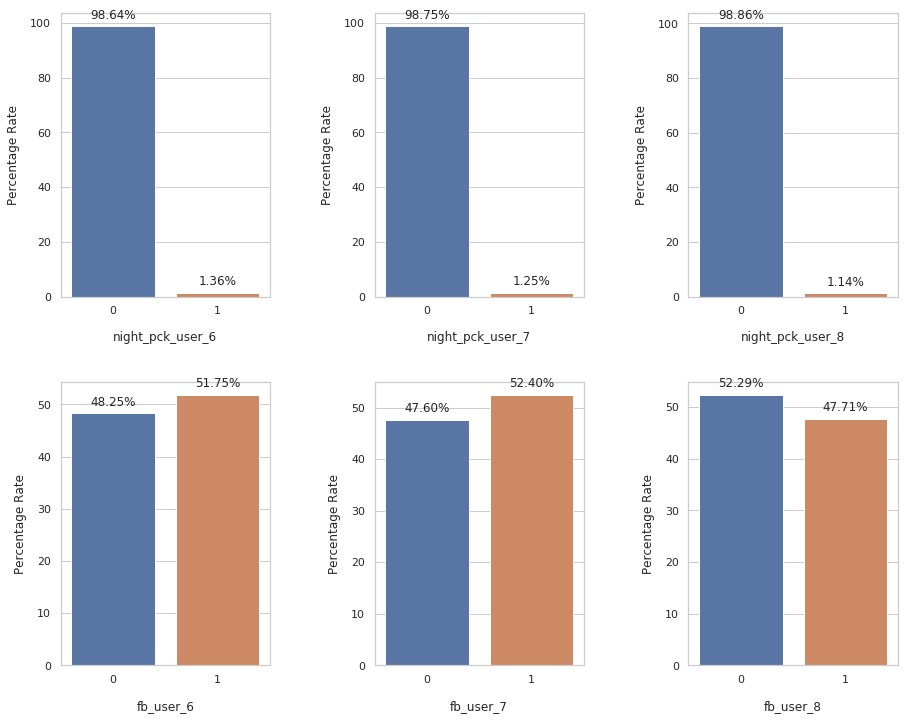

In [174]:
# Univariate Plot Analysis of Ordered categorical variables vs Percentage Rate
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
counter = 1

plt.figure(figsize = (15, 12))

for col_list in category_list:        
    series = round(((telecom_data[col_list].value_counts(dropna = False))/(len(telecom_data[col_list])) * 100), 2)
    plt.subplot(2, 3, counter)
    ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
    plt.xlabel(col_list, labelpad = 15)
    plt.ylabel('Percentage Rate', labelpad = 10)

    # Call Custom Function
    add_data_labels(ax)
    counter += 1

del category_list, counter, ax

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

From the `night_pck_user` variables, it can be inferred that almost 99% of users are not using nightly pack in all the 3 months.

However users are using facebook(fb) `fb_user` in equal percentage and it is observed that as the month increases, there is a decline in the fb usage.

Positive examples = 2441
Negative examples = 27560
Proportion of positive to negative examples = 8.86%


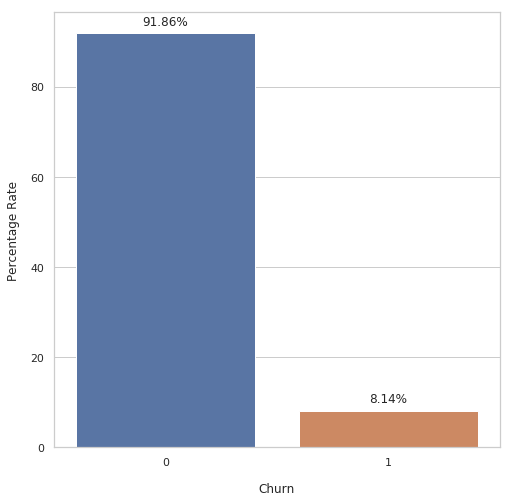

In [175]:
# Get number of positve and negative examples

pos = telecom_data[telecom_data["churn"] == 1].shape[0]
neg = telecom_data[telecom_data["churn"] == 0].shape[0]

print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Proportion of positive to negative examples = {(pos / neg) * 100:.2f}%")

plt.figure(figsize = (8, 8))
series = round(((telecom_data["churn"].value_counts(dropna = False))/(len(telecom_data["churn"])) * 100), 2)
ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
plt.xlabel("Churn", labelpad = 15)
plt.ylabel('Percentage Rate', labelpad = 10)

# Call Custom Function

add_data_labels(ax)
plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

**From the above bar plot it is evident that the dataset is highly imbalanced. The proportion for churn to non-churn is around 8%.**

**For a correct and smooth analysis we need to deal with this class imbalance problem. We will deal with this in a later section after feature engineering.**

There are lot of Outliers present in the variables. We will remove these outliers by performaing normalization in the latter stage.

### 3. Bivariate Analysis - Variables with hue = churn

In [176]:
# Custom Function for Bivariate Analysis

# Function Parameters   -

# y_axis                -      The series/variable to be plotted along the y-axis.

def plot_bivariate(y_axis):
    plt.figure(figsize = (15, 5))
    xlabel = "Churn"
    x_axis = "churn"
    title_1 = "Month 6 - " + xlabel
    title_2 = "Month 7 - " + xlabel
    title_3 = "Month 8 - " + xlabel
    print("\nData Visualization of churn vs " + y_axis)

    # Subplot - 1
    plt.subplot(1, 3, 1)
    sns.boxplot(x = x_axis, y = y_axis + "_6", hue = "churn", data = telecom_data, showfliers = False)
    
    #sns.barplot(x = x_axis, y = y_axis + "_6", hue = "churn", data = telecom_data)
    # Call Custom Function
    set_plotting_variable(title_1, xlabel, y_axis + "_6")

    # Subplot - 2
    plt.subplot(1, 3, 2)
    sns.boxplot(x = x_axis, y = y_axis + "_7", hue = "churn", data = telecom_data, showfliers = False)
    #sns.barplot(x = x_axis, y = y_axis + "_7", hue = "churn", data = telecom_data)
    # Call Custom Function
    set_plotting_variable(title_2, xlabel, y_axis + "_7")
    
    # Subplot - 3
    plt.subplot(1, 3, 3)
    sns.boxplot(x = x_axis, y = y_axis + "_8", hue = "churn", data = telecom_data, showfliers = False)
    #sns.barplot(x = x_axis, y = y_axis + "_8", hue = "churn", data = telecom_data)
    # Call Custom Function
    set_plotting_variable(title_3, xlabel, y_axis + "_8")
    plt.subplots_adjust(wspace = 0.4)
    plt.show()


Data Visualization of churn vs arpu


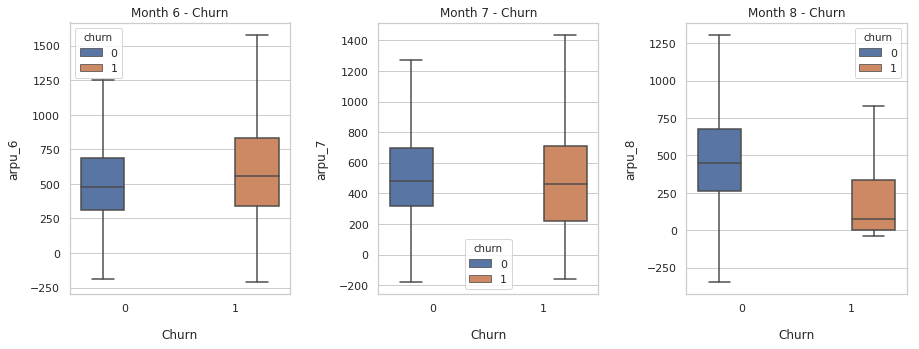


Data Visualization of churn vs onnet_mou


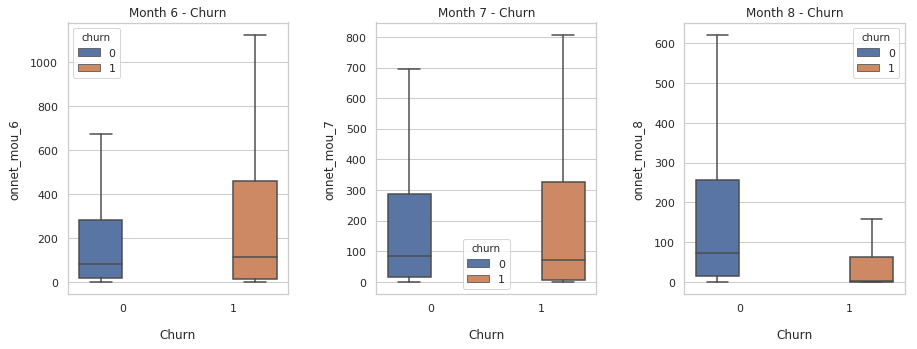


Data Visualization of churn vs offnet_mou


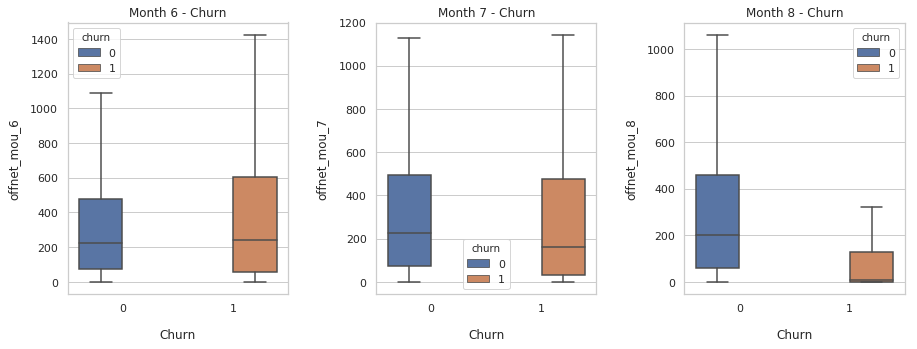


Data Visualization of churn vs total_og_mou


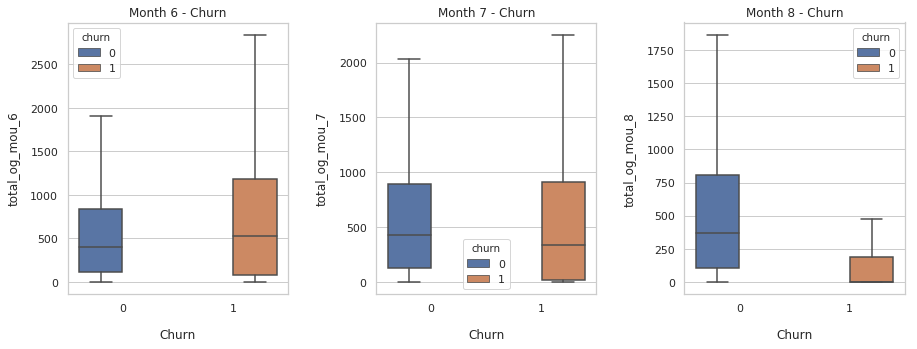


Data Visualization of churn vs total_ic_mou


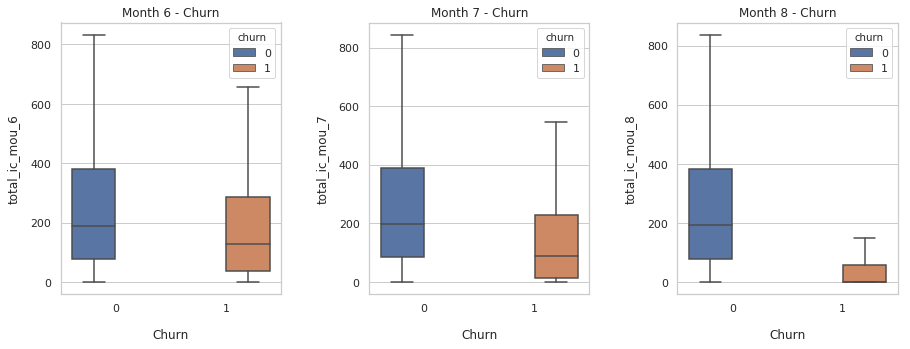


Data Visualization of churn vs total_rech_num


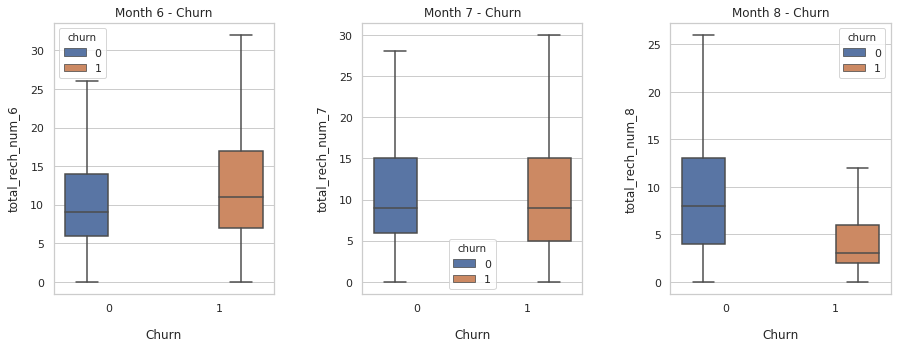


Data Visualization of churn vs total_rech_amt


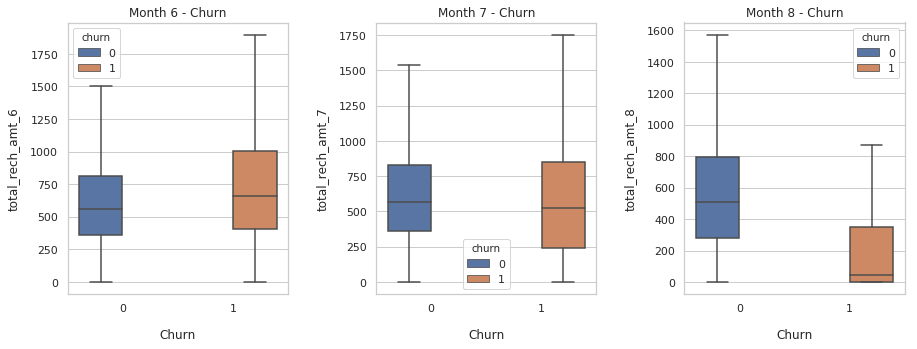


Data Visualization of churn vs total_rech_data


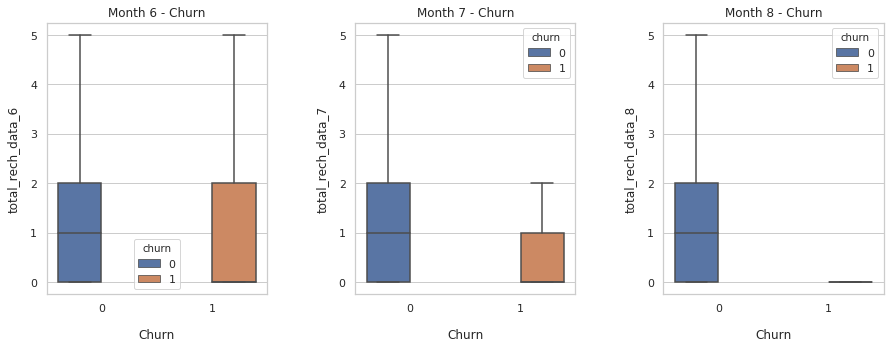


Data Visualization of churn vs vol_2g_mb


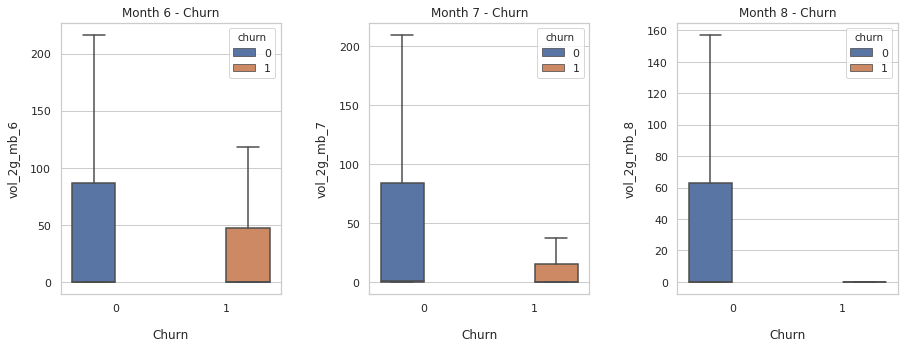


Data Visualization of churn vs vol_3g_mb


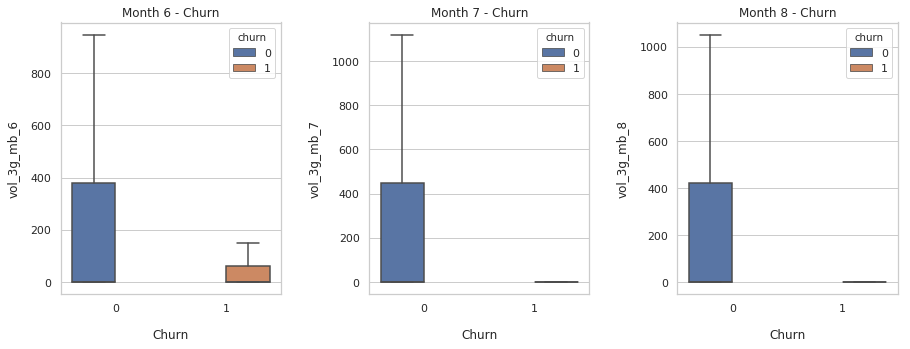


Data Visualization of churn vs vbc_3g


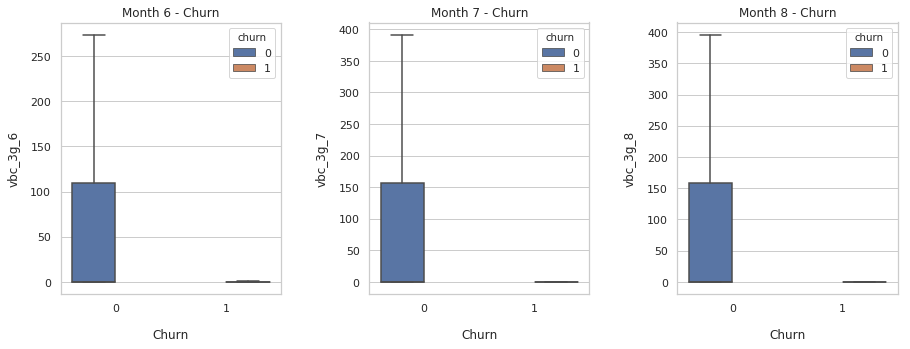


Data Visualization of churn vs total_data_rech_amt


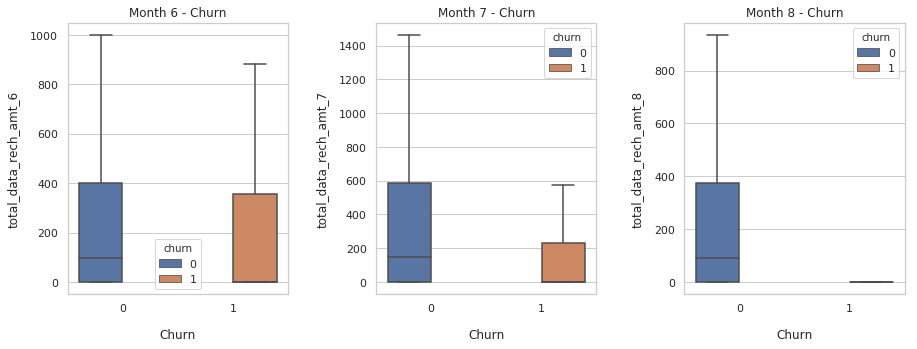

In [177]:
# Custom Function for Default Plotting variables

# Function Parameters  - 

# figure_title         -    The title to use for the plot.
# xlabel               -    The x-axis label for the plot.
# ylabel               -    The y-axis label for the plot.

def set_plotting_variable(figure_title, xlabel, ylabel):
    plt.title(figure_title)
    plt.xlabel(xlabel, labelpad = 15)
    plt.ylabel(ylabel, labelpad = 10)
    
# Bivariate Analysis

plot_bivariate("arpu")
plot_bivariate("onnet_mou")
plot_bivariate("offnet_mou")
plot_bivariate("total_og_mou")
plot_bivariate("total_ic_mou")
plot_bivariate("total_rech_num")
plot_bivariate("total_rech_amt")
plot_bivariate("total_rech_data")
plot_bivariate("vol_2g_mb")
plot_bivariate("vol_3g_mb")
plot_bivariate("vbc_3g")
plot_bivariate("total_data_rech_amt")

There is a significant drop in the columns for data in 8th month for churned customers.

### 4. Bivariate Analysis - Quantitative Variables

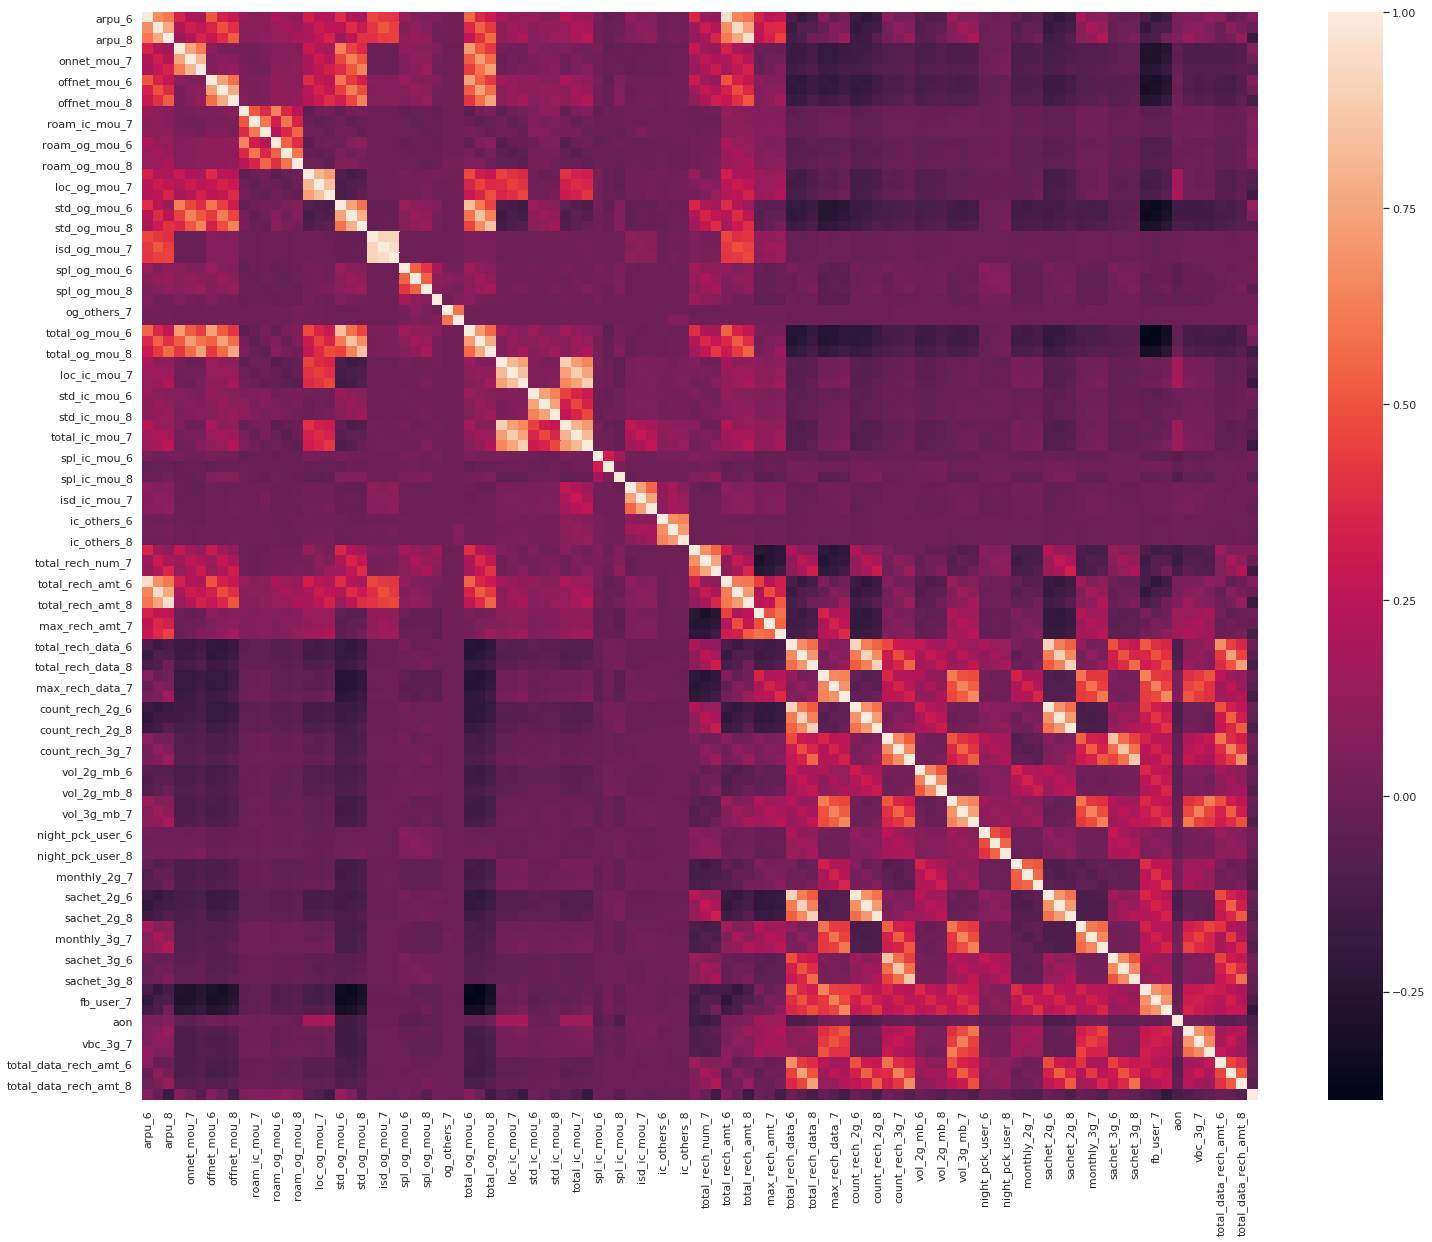

In [178]:
# let's ceate coorealation map

plt.figure(figsize = (25, 20))
sns.heatmap(telecom_data.corr())
plt.show()

Now from the above correlation matrix we can see there are some highly correlated features. Lets try to extract such highly correlated features.

In [179]:
corr_matrix = telecom_data.corr().abs()

# the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

upper_triangle = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)))
highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]
print("List of highly correlated features from the above plot - \n\n", highly_correlated_features)
print("\n\nTotal features with high correlation - ", len(highly_correlated_features))

List of highly correlated features from the above plot - 

 ['onnet_mou_8', 'loc_og_mou_7', 'loc_og_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']


Total features with high correlation -  25


- There are many features that are highly correlated.

- Total of 25 features with a correlation > 0.80

#### Note - 

- **We will keep these highly correlated features for now. As we will be performing Principal Component Analysis in a later section these should get dropped automatically**

# Part 5 - Feature Engineering

## Understanding Customer Behaviour During Churn

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

 

In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

In [180]:
# Custom Function to derive new good phase columns and drop the original columns 

def derive_good_action_phase(df, col):
    col_6 = col + "_6"
    col_7 = col + "_7"
    col_8 = col + "_8"
    good_phase_col = col + "_good_phase"
    action_phase_col = col + "_action_phase"  
    df[good_phase_col] = (df[col_6] + df[col_7])/2
    df[action_phase_col] = df[col_8] - df[good_phase_col]
    df.drop([col_6, col_7, col_8], axis = 1, inplace = True)
    
    return df

In [181]:
# Derive Good and Action Phase Variables

telecom_data = derive_good_action_phase(telecom_data, "arpu")
telecom_data = derive_good_action_phase(telecom_data, "onnet_mou")
telecom_data = derive_good_action_phase(telecom_data, "offnet_mou")
telecom_data = derive_good_action_phase(telecom_data, "roam_ic_mou")
telecom_data = derive_good_action_phase(telecom_data, "roam_og_mou")
telecom_data = derive_good_action_phase(telecom_data, "loc_og_mou")
telecom_data = derive_good_action_phase(telecom_data, "std_og_mou")
telecom_data = derive_good_action_phase(telecom_data, "isd_og_mou")
telecom_data = derive_good_action_phase(telecom_data, "spl_og_mou")
telecom_data = derive_good_action_phase(telecom_data, "og_others")
telecom_data = derive_good_action_phase(telecom_data, "total_og_mou")
telecom_data = derive_good_action_phase(telecom_data, "loc_ic_mou")
telecom_data = derive_good_action_phase(telecom_data, "std_ic_mou")
telecom_data = derive_good_action_phase(telecom_data, "spl_ic_mou")
telecom_data = derive_good_action_phase(telecom_data, "isd_ic_mou")
telecom_data = derive_good_action_phase(telecom_data, "ic_others")
telecom_data = derive_good_action_phase(telecom_data, "total_ic_mou")
telecom_data = derive_good_action_phase(telecom_data, "total_rech_num")
telecom_data = derive_good_action_phase(telecom_data, "total_rech_amt")
telecom_data = derive_good_action_phase(telecom_data, "max_rech_amt")
telecom_data = derive_good_action_phase(telecom_data, "total_rech_data")
telecom_data = derive_good_action_phase(telecom_data, "max_rech_data")
telecom_data = derive_good_action_phase(telecom_data, "count_rech_2g")
telecom_data = derive_good_action_phase(telecom_data, "count_rech_3g")
telecom_data = derive_good_action_phase(telecom_data, "vol_2g_mb")
telecom_data = derive_good_action_phase(telecom_data, "vol_3g_mb")
telecom_data = derive_good_action_phase(telecom_data, "monthly_2g")
telecom_data = derive_good_action_phase(telecom_data, "sachet_2g")
telecom_data = derive_good_action_phase(telecom_data, "monthly_3g")
telecom_data = derive_good_action_phase(telecom_data, "sachet_3g")
telecom_data = derive_good_action_phase(telecom_data, "vbc_3g")
telecom_data = derive_good_action_phase(telecom_data, "total_data_rech_amt")
telecom_data.head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,churn,arpu_good_phase,arpu_action_phase,onnet_mou_good_phase,onnet_mou_action_phase,offnet_mou_good_phase,offnet_mou_action_phase,roam_ic_mou_good_phase,roam_ic_mou_action_phase,roam_og_mou_good_phase,roam_og_mou_action_phase,loc_og_mou_good_phase,loc_og_mou_action_phase,std_og_mou_good_phase,std_og_mou_action_phase,isd_og_mou_good_phase,isd_og_mou_action_phase,spl_og_mou_good_phase,spl_og_mou_action_phase,og_others_good_phase,og_others_action_phase,total_og_mou_good_phase,total_og_mou_action_phase,loc_ic_mou_good_phase,loc_ic_mou_action_phase,std_ic_mou_good_phase,std_ic_mou_action_phase,spl_ic_mou_good_phase,spl_ic_mou_action_phase,isd_ic_mou_good_phase,isd_ic_mou_action_phase,ic_others_good_phase,ic_others_action_phase,total_ic_mou_good_phase,total_ic_mou_action_phase,total_rech_num_good_phase,total_rech_num_action_phase,total_rech_amt_good_phase,total_rech_amt_action_phase,max_rech_amt_good_phase,max_rech_amt_action_phase,total_rech_data_good_phase,total_rech_data_action_phase,max_rech_data_good_phase,max_rech_data_action_phase,count_rech_2g_good_phase,count_rech_2g_action_phase,count_rech_3g_good_phase,count_rech_3g_action_phase,vol_2g_mb_good_phase,vol_2g_mb_action_phase,vol_3g_mb_good_phase,vol_3g_mb_action_phase,monthly_2g_good_phase,monthly_2g_action_phase,sachet_2g_good_phase,sachet_2g_action_phase,monthly_3g_good_phase,monthly_3g_action_phase,sachet_3g_good_phase,sachet_3g_action_phase,vbc_3g_good_phase,vbc_3g_action_phase,total_data_rech_amt_good_phase,total_data_rech_amt_action_phase
0,0,0,0,1,1,1,968,1,206.1005,7.7025,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.0,0.0,0.000,0.000,0.000,5.440,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.440,3.5,-1.5,307.0,-55.0,252.0,0.0,1.0,0.0,252.0,0.0,0.0,0.0,1.0,0.0,15.725,-9.975,117.165,-7.555,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.600,-20.200,252.0,0.0
1,0,0,0,0,0,0,802,1,1209.5150,1961.9650,56.26,-3.97,510.295,-184.385,24.86,6.78,18.165,19.895,478.035,-222.245,68.000,9.840,0.090,9.920,2.25,4.25,0.0,0.0,548.385,-198.225,391.555,-203.515,176.810,17.130,0.105,-0.105,8.295,23.295,15.465,-0.325,592.250,-163.510,5.0,2.0,1185.0,2453.0,1185.0,395.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.060,38.680,0.0,0.0
2,0,0,0,0,1,1,315,0,435.4720,-298.1100,382.36,-347.28,87.645,48.835,0.00,0.00,0.000,0.000,333.135,-270.095,136.870,-38.590,0.000,0.000,0.00,10.23,0.0,0.0,470.010,-298.450,52.630,-36.840,13.545,-12.795,0.000,0.000,0.000,0.000,0.000,0.000,66.175,-49.635,20.0,-6.0,519.0,-399.0,122.0,-92.0,1.0,2.0,77.0,-54.0,1.0,2.0,0.0,0.0,178.000,-177.970,375.475,-363.535,0.5,-0.5,0.5,2.5,0.0,0.0,0.0,0.0,516.405,-495.375,177.0,30.0
3,0,0,0,0,0,0,720,0,556.1030,81.6570,117.26,-32.12,827.305,156.085,0.00,0.00,0.000,0.000,95.565,34.175,848.990,89.800,0.000,0.000,0.00,0.00,0.0,0.0,944.565,123.975,106.505,52.605,62.985,38.945,0.000,0.000,0.000,0.000,0.000,0.000,169.490,91.550,24.0,3.0,640.0,78.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0
4,0,0,0,0,1,1,604,0,134.1235,232.8425,49.81,-16.23,87.385,118.505,0.00,0.00,0.000,0.000,132.795,49.345,4.355,35.255,0.005,-0.005,0.05,17.66,0.0,0.0,137.210,102.270,145.520,78.690,8.915,48.375,0.000,0.000,14.115,-10.375,2.675,10.385,171.235,127.095,4.0,0.0,227.0,212.0,89.5,89.5,1.0,1.0,89.5,89.5,0.0,0.0,1.0,1.0,0.240,-0.230,299.545,710.375,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,25.930,14.520,356.0,184.0


In [182]:
telecom_data.shape

(30001, 72)

# Part 6 - Model Building

## 1. Train and Test Split

In [183]:
X = telecom_data.drop('churn', axis = 1)
y = telecom_data[['churn']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21000, 71)
(21000, 1)
(9001, 71)
(9001, 1)


## 2. Data Normalization (Outlier Treatment)


In [184]:
# Normalize the data

scaler = RobustScaler()
scaled_data = scaler.fit_transform(X_train)
X_train = pd.DataFrame(data = scaled_data, index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

## 3. Handling Imbalanced Dataset

#### Pre-Processing Techniques

As a part of pre-processing stage of ML pipelines prior, the following algorithms will be used for handling imbalanced dataset.

1. Undersampling
 - Random undersampling


2. Oversampling
 - Random oversampling: generates new samples by random resampling with replacement of under represented class
 - Synthetic Minority Oversampling (SMOTE)


3. Combined over and under sampling
 - SMOTEENN
 - SMOTETomek


#### Training techniques

Number of learning models themselves do provide some built in support to deal with imbalance data.

1. Sample weighting

**Fact:**

SMOTE allows to generate samples. However, this method of over-sampling does not have any knowledge regarding the underlying distribution. Therefore, some noisy samples can be generated, e.g. when the different classes cannot be well separated. Hence, it can be beneficial to apply an under-sampling algorithm to clean the noisy samples. Imbalanced-learn provides two ready-to-use combined samplers:
- SMOTETomek
- SMOTEENN

Both the methods are good but in general, SMOTEENN cleans more noisy data than SMOTETomek.

**Note:**

 - **It is not possible to check different sampling techniques on very cost sensitive Machine Learning models like SVM, Decision Trees, Random Forest. For this Case Study, we will particularily use SMOTEENN sampling technique to handle imbalanced dataset as it is uses both over-sampling and under-sampling method and helps in cleaning noisy samples.**

In [185]:
# Implement SMOTEENN
def implement_smoteenn(X_train, y_train):
    sampling = SMOTEENN(random_state = 100)
    X_train_resampled, y_train_resampled = sampling.fit_sample(X_train.values, y_train.values.ravel())

    # Shuffle the data
    perms = np.random.permutation(X_train_resampled.shape[0])
    X_train_resampled = X_train_resampled[perms]
    y_train_resampled = y_train_resampled[perms]
    X_train_resampled = pd.DataFrame(data = X_train_resampled)
    y_train_resampled = pd.DataFrame(data = y_train_resampled)
    print(X_train_resampled.shape)
    print(y_train_resampled.shape)
    
    return X_train_resampled, y_train_resampled

In [186]:
# Custom Function for ensembling classifiers using sampling and then Shuffling the data

def transform(transformer, X, y):
    
    print("Transforming {}".format(transformer.__class__.__name__))
    X_resampled, y_resampled = transformer.fit_sample(X.values, y.values.ravel())
    
    # Shuffle the data
    perms = np.random.permutation(X_resampled.shape[0])
    X_resampled = X_resampled[perms]
    y_resampled = y_resampled[perms]
    
    # Return the classifier, X_resampled and y_resampled
    return transformer.__class__.__name__, pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)

In [187]:
# Custom Function to Apply transformations to dataset

def apply_transformations(dataset, X_train, y_train):
    dataset.append(("base", X_train, y_train))
    dataset.append(transform(SMOTE(n_jobs = -1, random_state = 100), X_train, y_train))
    dataset.append(transform(RandomOverSampler(random_state = 100), X_train, y_train))
    dataset.append(transform(NearMiss(n_jobs = -1, random_state = 100), X_train, y_train))
    dataset.append(transform(RandomUnderSampler(random_state = 100), X_train, y_train))
    dataset.append(transform(SMOTEENN(random_state = 100), X_train, y_train))
    dataset.append(transform(SMOTETomek(random_state = 100), X_train, y_train))   
    return dataset

## 4. Model Building

In [188]:
# Custom Function to get Scores and plots
def get_scores(scores, reg, X_test):
    
    # Plot ROC and PR curves using all models and test data
    fig, axes = plt.subplots(1, 2, figsize = (14, 6))

    pred_test = reg.predict(X_test.values)

    pred_test_probs = reg.predict_proba(X_test.values)[:, 1:]

    fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), pred_test)
    p, r, t = precision_recall_curve(y_test.values.ravel(), pred_test_probs)

    model_f1_score = f1_score(y_test.values.ravel(), pred_test)
    model_precision_score = precision_score(y_test.values.ravel(), pred_test)
    model_recall_score = recall_score(y_test.values.ravel(), pred_test)
    model_accuracy_score = accuracy_score(y_test.values.ravel(), pred_test)
    model_auc_roc = auc(fpr, tpr)
    model_auc_pr = auc(p, r, reorder = True)

    scores.append((model_f1_score,
                   model_precision_score,
                   model_recall_score,
                   model_accuracy_score,
                   model_auc_roc,
                   model_auc_pr,
                   confusion_matrix(y_test.values.ravel(), pred_test)))

    axes[0].plot(fpr, tpr, label = f"auc_roc = {model_auc_roc:.3f}")
    axes[1].plot(r, p, label = f"auc_pr = {model_auc_pr:.3f}")

    axes[0].plot([0, 1], [0, 1], 'k--')
    axes[0].legend(loc = "lower right")
    axes[0].set_xlabel("False Positive Rate")
    axes[0].set_ylabel("True Positive Rate")
    axes[0].set_title("AUC ROC curve")

    axes[1].legend(loc = "lower right")
    axes[1].set_xlabel("recall")
    axes[1].set_ylabel("precision")
    axes[1].set_title("PR curve")

    plt.tight_layout()
    plt.show()
    
    return scores

In [189]:
# Custom Function for Model Building

def model(sampling_type, X, y, param_grid, model_type, ml = 'None'):
    
    model_type_list = ['Logistic', 'SVM', 'Decision Tree', 'Random Forest', 'Adaboost', 'XGBoost', 'LightGBM']
    
    if model_type == 'Logistic':
    
        ml = LogisticRegression(penalty = 'l2', C = 10, n_jobs = -1, random_state = 100)
    
    elif model_type == 'SVM':
        
        ml = SVC(C = 1000, kernel = 'rbf', probability = True, random_state = 100)
    
    elif model_type == 'Decision Tree':
        
        ml = DecisionTreeClassifier(max_depth = 7, min_samples_split = 26, min_samples_leaf = 46, random_state = 100)
    
    elif model_type == 'Random Forest':
        
        ml = RandomForestClassifier(n_estimators = 900, max_depth = 29, min_samples_split = 2, min_samples_leaf = 1,
                                    n_jobs = -1, random_state = 100)
    
    elif model_type == 'Adaboost':
        
        dt = DecisionTreeClassifier(max_depth = 17, min_samples_split = 3, min_samples_leaf = 1, random_state = 100)

        ml = AdaBoostClassifier(base_estimator = dt, n_estimators = 300, learning_rate = 0.3, random_state = 100)
    
    elif model_type == 'XGBoost':
        
        ml = XGBClassifier(max_depth = 18, learning_rate = 0.3, n_estimators = 900, min_child_weight = 1,
                           subsample = 0.9, colsample_bytree = 0.4, n_jobs = -1, random_state = 100)
    
    elif model_type == 'LightGBM':
        
        ml = LGBMClassifier(num_leaves = 70, max_depth = 29, learning_rate = 0.5, n_estimators = 600,
                            min_child_samples = 20, subsample = 0.1, colsample_bytree = 1,
                            objective = 'binary', n_jobs = -1, random_state = 100)
    
    if model_type not in model_type_list:
        
        gc = GridSearchCV(estimator = ml, param_grid = param_grid, scoring = 'roc_auc',
                          n_jobs = 15, cv = 5, verbose = 2)
    
    else:
        
        gc = ml
    
    gc = gc.fit(X.values, y.values.ravel())
    
    if model_type in model_type_list:
        
        return sampling_type, gc
    
    else:
        
        return gc

In [190]:
# Custom Function to plot GridSearch Result to get the best value

def hypertuning_plot(scores, parameter):
    col = "param_" + parameter
    plt.figure()
    plt.plot(scores[col], scores["mean_score_time"], label = "training accuracy")
    plt.plot(scores[col], scores["mean_test_score"], label = "test accuracy")
    plt.xlabel(parameter)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

In [191]:
# Custom Function to Train/evaluate models for each of tranformed datasets

def evaluate_train(scores, benchmark_scores, dataset, X_test):
    
    # Plot ROC and PR curves using all models and test data
    fig, axes = plt.subplots(1, 2, figsize = (14, 6))

    # train models based on benchmark params
    for sampling_type, reg in benchmark_scores:

        print("Training on {}".format(sampling_type))

        for s_type, X, y in dataset:

            if s_type == sampling_type:

                pred_test = reg.predict(X_test.values)

                probs = reg.predict_proba(X_test.values)[:, 1:]

                fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), pred_test)
                p, r, t = precision_recall_curve(y_test.values.ravel(), probs)

                model_f1_score = f1_score(y_test.values.ravel(), pred_test)
                model_precision_score = precision_score(y_test.values.ravel(), pred_test)
                model_recall_score = recall_score(y_test.values.ravel(), pred_test)
                model_accuracy_score = accuracy_score(y_test.values.ravel(), pred_test)
                model_auc_roc = auc(fpr, tpr)
                model_auc_pr = auc(p, r, reorder = True)

                scores.append((sampling_type,
                               model_f1_score,
                               model_precision_score,
                               model_recall_score,
                               model_accuracy_score,
                               model_auc_roc,
                               model_auc_pr,
                               confusion_matrix(y_test.values.ravel(), pred_test)))

                axes[0].plot(fpr, tpr, label = f"{s_type}, auc_roc = {model_auc_roc:.3f}")
                axes[1].plot(r, p, label = f"{s_type}")

    axes[0].plot([0, 1], [0, 1], 'k--')
    axes[0].legend(loc = "lower right")
    axes[0].set_xlabel("False Positive Rate")
    axes[0].set_ylabel("True Positive Rate")
    axes[0].set_title("AUC ROC curve")
    axes[1].legend()
    axes[1].set_xlabel("recall")
    axes[1].set_ylabel("precision")
    axes[1].set_title("PR curve")
    plt.tight_layout()
    plt.show()
    
    return scores

In [192]:
def get_different_sampling_type_results(regression_type, X_test):
    
    # Apply Logistic Regression with on Different Sampling Types

    benchmark_scores = []
    param_grid = {}
    for sample_type, X, y in dataset:
        print('Performing {}'.format(sample_type))
        benchmark_scores.append(model(sample_type, X, y, param_grid, regression_type))
    print(' ')
    
    # Train/evaluate models for each of tranformed datasets
    scores = []
    scores = evaluate_train(scores, benchmark_scores, dataset, X_test)

    # Tabulate results
    sampling_results = pd.DataFrame(scores, columns = ['Sampling Type', 'f1', 'precision', 'recall', 'accuracy',
                                                       'auc_roc', 'auc_pr', 'confusion_matrix'])
    
    return sampling_results

## 4.1 PCA - Dimensionality Reduction

In [193]:
def perform_PCA(X):
    pca = PCA(svd_solver = 'randomized', random_state = 100)

    #Doing the PCA on the train data
    pca.fit(X)
    
    # Making the screeplot - plotting the cumulative variance against the number of components
    fig = plt.figure(figsize = (12,8))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()

In [194]:
def perform_incremental_PCA(X_train, y_train, components):
    
    # Using incremental PCA for efficiency - saves a lot of time on larger datasets

    pca_final = IncrementalPCA(n_components = components)
    X_train_pca = pca_final.fit_transform(X_train)
    X_test_pca = pca_final.transform(X_test)
    X_train_pca = pd.DataFrame(data = X_train_pca)
    X_test_pca = pd.DataFrame(data = X_test_pca)

    print(X_train_pca.shape)
    print(y_train.shape)
    print(X_test_pca.shape)
    print(y_test.shape)
    
    #creating correlation matrix for the principal components
    corrmat = np.corrcoef(X_train_pca.transpose())

    #plotting the correlation matrix
    plt.figure(figsize = (20,10))
    sns.heatmap(corrmat, annot = True)
    plt.show()
    
    # 1s -> 0s in diagonals
    corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
    print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
    # we see that correlations are indeed very close to 0
    
    return X_train_pca, X_test_pca

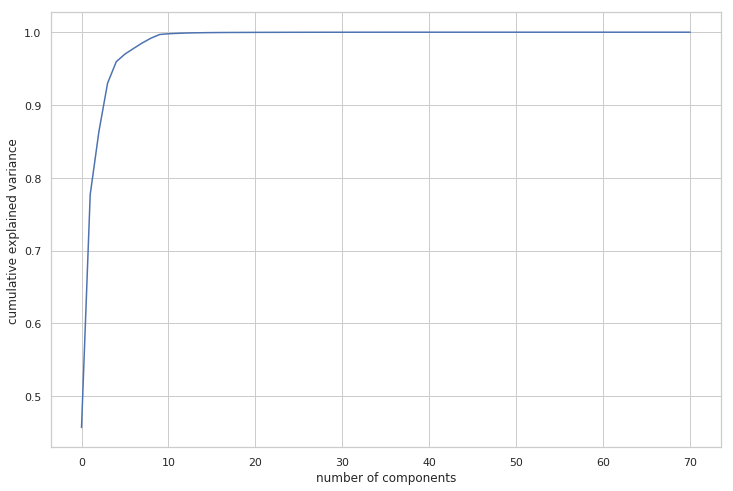

In [195]:
perform_PCA(X_train)

Looks like 5 components are enough to describe 95% of the variance in the dataset. Let's choose 5 components for modeling.

(21000, 5)
(21000, 1)
(9001, 5)
(9001, 1)


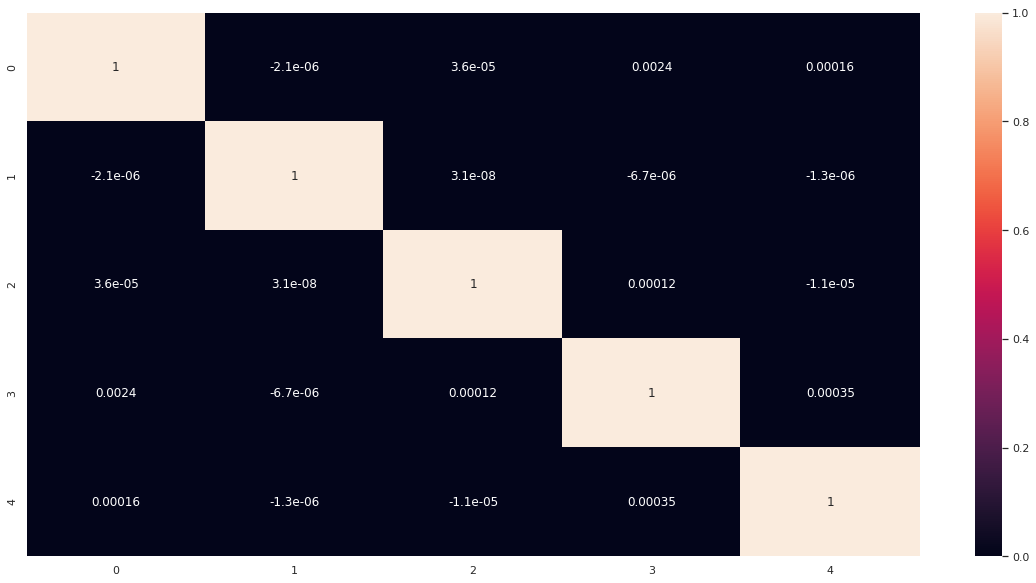

max corr: 0.002421651058526752 , min corr:  -1.0760815074927287e-05


In [196]:
X_train_pca, X_test_pca = perform_incremental_PCA(X_train, y_train, 5)

**There is no correlation between any two components.**

#### Now Let's handle Class Imbalance on PCA derived data

In [197]:
# Implement SMOTEENN

X_train_resampled, y_train_resampled = implement_smoteenn(X_train_pca, y_train)

(26696, 5)
(26696, 1)


## 4.2 Logistic Regression

#### Running the Logistic Regression with default parameters.

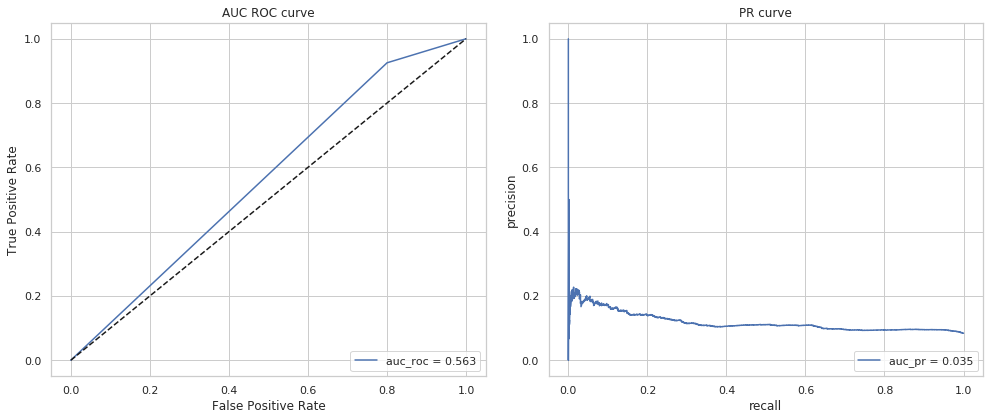

,f1,precision,recall,accuracy,auc_roc,auc_pr,confusion_matrix
0,0.172487,0.095108,0.925333,0.260193,0.562533,0.035117,"[[1648, 6603], [56, 694]]"


In [198]:
# Logistic Regression with Default Parameters

lr = LogisticRegression(n_jobs = -1, random_state = 100)
lr = lr.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []
scores = get_scores(scores, lr, X_test_pca)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

**This is the initial output with default parameters. We will now proceed with hypertuning using GridSearch**

### 4.2.1 Logistic Regression - HyperTuning

#### Logistic Regression - HyperTuning Penalty

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   5 out of  10 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=15)]: Done  10 out of  10 | elapsed:    0.7s finished


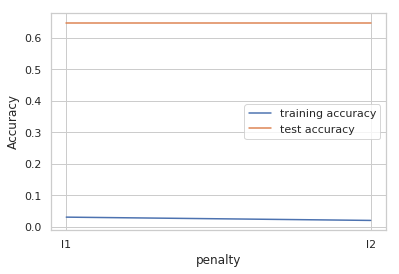

{'penalty': 'l1'}

In [199]:
# GridSearchCV to find best penalty

lr = LogisticRegression(n_jobs = -1, random_state = 100)
parameter = 'penalty'

# parameters to build the model on
param_grid = {parameter: ['l1', 'l2']}
gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lr)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

#### Logistic Regression - HyperTuning C

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   2 out of  20 | elapsed:    0.8s remaining:    7.5s
[Parallel(n_jobs=15)]: Done  13 out of  20 | elapsed:    1.4s remaining:    0.8s
[Parallel(n_jobs=15)]: Done  20 out of  20 | elapsed:    1.7s finished


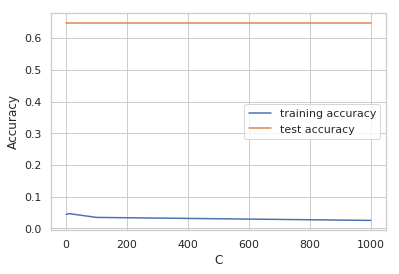

{'C': 1}

In [200]:
# GridSearchCV to find best C

# Penalty remains the same and hence any penalty method (l1 or l2) can be taken into consideration.

lr = LogisticRegression(penalty = 'l2', n_jobs = -1, random_state = 100)
parameter = 'C'

# parameters to build the model on
param_grid = {parameter: [1, 10, 100, 1000]}
gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lr)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

#### Running the Logistic Regression with best parameters obtained from grid search.

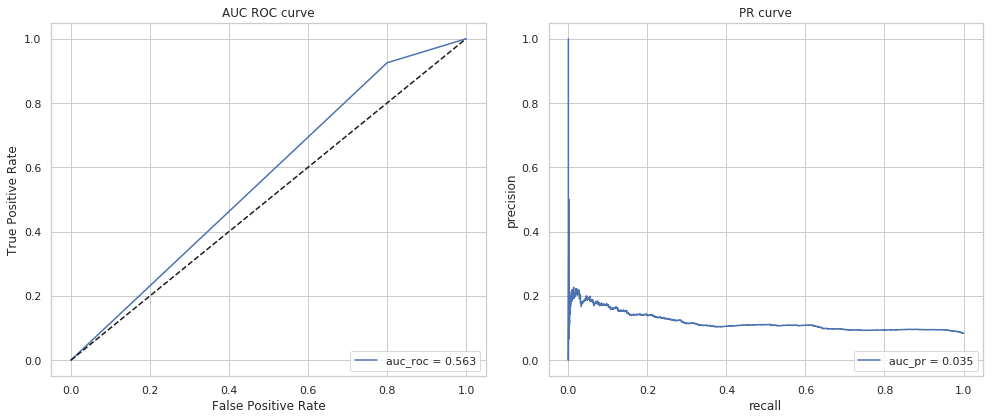

,f1,precision,recall,accuracy,auc_roc,auc_pr,confusion_matrix
0,0.172487,0.095108,0.925333,0.260193,0.562533,0.035117,"[[1648, 6603], [56, 694]]"


In [201]:
# Logistic with best parameters obtained from grid search

lr = LogisticRegression(penalty = 'l2', C = 10, n_jobs = -1, random_state = 100)
lrf = lr.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []
scores = get_scores(scores, lrf, X_test_pca)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

**The score is very low. Let's see what is the effect of other sampling techniques.**

In [202]:
# Apply Class Imbalance transformations to dataset

dataset = []
dataset = apply_transformations(dataset, X_train_resampled, y_train_resampled)

Transforming SMOTE
Transforming RandomOverSampler
Transforming NearMiss
Transforming RandomUnderSampler
Transforming SMOTEENN
Transforming SMOTETomek


Performing base
Performing SMOTE
Performing RandomOverSampler
Performing NearMiss
Performing RandomUnderSampler
Performing SMOTEENN
Performing SMOTETomek
 
Training on base
Training on SMOTE
Training on RandomOverSampler
Training on NearMiss
Training on RandomUnderSampler
Training on SMOTEENN
Training on SMOTETomek


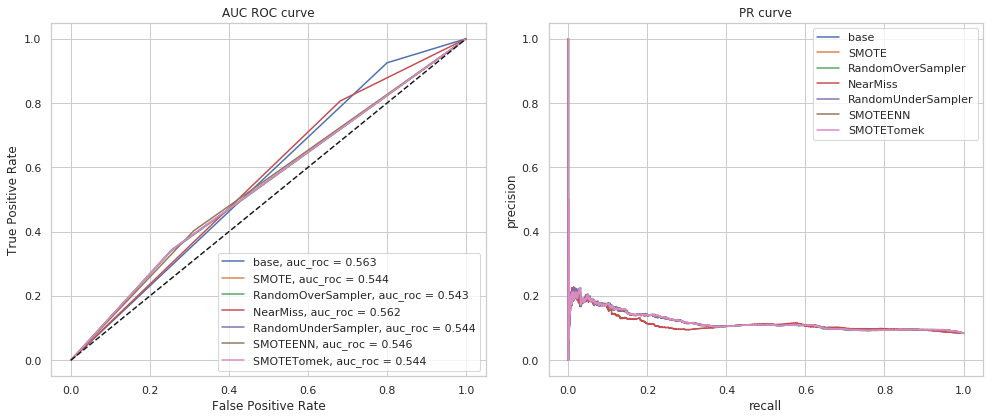

,Sampling Type,f1,precision,recall,accuracy,auc_roc,auc_pr,confusion_matrix
0,base,0.172487,0.095108,0.925333,0.260193,0.562533,0.035117,"[[1648, 6603], [56, 694]]"
1,SMOTE,0.165438,0.108907,0.344000,0.710810,0.544076,0.035761,"[[6140, 2111], [492, 258]]"
2,RandomOverSampler,0.164410,0.108418,0.340000,0.712032,0.542924,0.035591,"[[6154, 2097], [495, 255]]"
3,NearMiss,0.173328,0.097095,0.806667,0.358849,0.562405,0.032070,"[[2625, 5626], [145, 605]]"
4,RandomUnderSampler,0.165433,0.109037,0.342667,0.711921,0.544076,0.035719,"[[6151, 2100], [493, 257]]"
5,SMOTEENN,0.166943,0.105300,0.402667,0.665148,0.545837,0.035634,"[[5685, 2566], [448, 302]]"
6,SMOTETomek,0.165438,0.108907,0.344000,0.710810,0.544076,0.035768,"[[6140, 2111], [492, 258]]"


In [203]:
# Get Different Sampling Results

sampling_results = get_different_sampling_type_results('Logistic', X_test_pca)

# Tabulate results
sampling_results

### Obeservation

 - RandomUnderSampler leads to high recall but comes at a huge cost to precision (also reduces training time).
 - SMOTE and RandomOverSampler perform good considering auc_roc and auc_pr with accpetables levels of false positives.

**None of the Sampling Type scores can be accepted as they are very low. We will proceed with some different Machine Learning algorithms to increase the scores (f1, precision, recall, accuracy, auc_roc).**

## 4.3 Support Vector Machine (SVM)

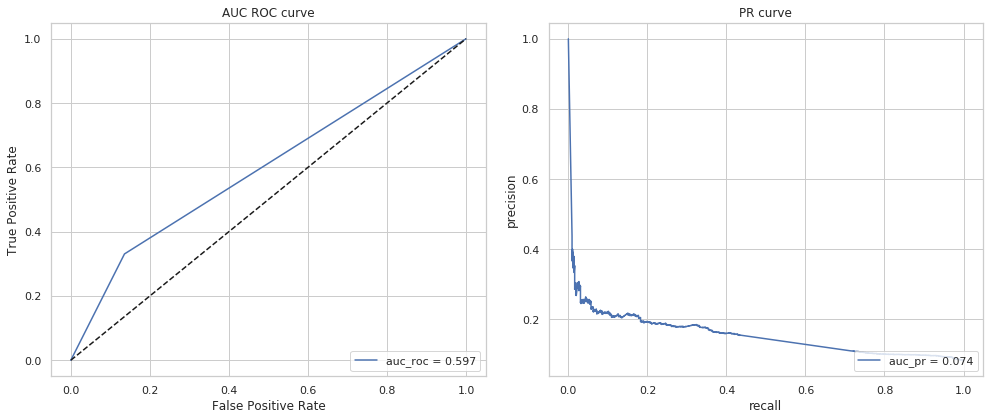

,f1,precision,recall,accuracy,auc_roc,auc_pr,confusion_matrix
0,0.234183,0.181287,0.330667,0.819798,0.597463,0.073571,"[[7131, 1120], [502, 248]]"


In [205]:
# SVM with Default Parameters and probability = True

svm = SVC(kernel = 'rbf', probability = True, random_state = 100)
svm = svm.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []
scores = get_scores(scores, svm, X_test_pca)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

**This is the initial output with default parameters. We will now proceed with hypertuning using GridSearch**

### 4.3.1 SVM - HyperTuning

#### SVM - HyperTuning Parameter C

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   5 out of  10 | elapsed: 25.3min remaining: 25.3min
[Parallel(n_jobs=15)]: Done  10 out of  10 | elapsed: 37.4min finished


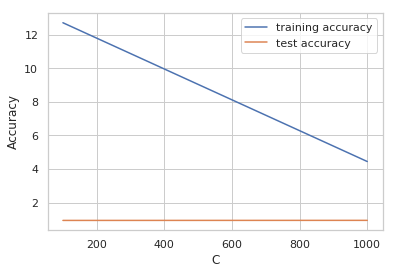

{'C': 1000}

In [206]:
# GridSearchCV to find best min_samples_split

svm = SVC(kernel = 'rbf', probability = True, random_state = 100)
parameter = 'C'

# parameters to build the model on
param_grid = {parameter: [100, 1000]}
gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', svm)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

#### Running the SVM with best parameters obtained from grid search.

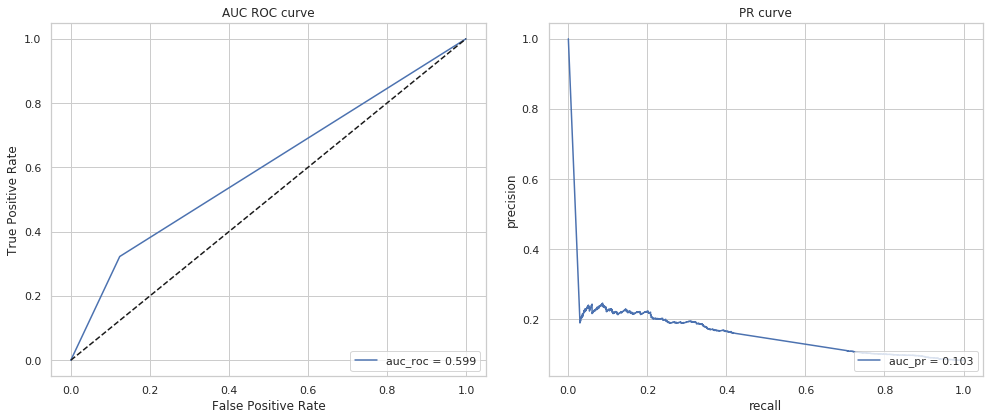

,f1,precision,recall,accuracy,auc_roc,auc_pr,confusion_matrix
0,0.240437,0.191607,0.322667,0.83013,0.599462,0.103164,"[[7230, 1021], [508, 242]]"


In [207]:
# SVM with best parameters obtained from grid search

svm = SVC(C = 1000, kernel = 'rbf', probability = True, random_state = 100)
svm = svm.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []
scores = get_scores(scores, svm, X_test_pca)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

### Observations:

From SVM:

 - With Default Parameters, we got:

| f1 | precision | recall | accuracy | auc_roc | auc_pr | confusion_matrix |
| --- | --- | --- | --- | --- | --- | --- |
| 0.221667 | 0.168309 | 0.324561 | 0.825771 | 0.595908 | 0.069665 | [[7167, 1097], [462, 222]] |

- And With HyperTuning, we got:

| f1 | precision | recall | accuracy | auc_roc | auc_pr | confusion_matrix |
| --- | --- | --- | --- | --- | --- | --- |
| 0.223237 | 0.17094 | 0.321637 | 0.8289 | 0.596262 | 0.087339 | [[7197, 1067], [464, 220]] |

**The score is very low. Let's see the effect of other sampling techniques.**

Performing base
Performing SMOTE
Performing RandomOverSampler
Performing NearMiss
Performing RandomUnderSampler
Performing SMOTEENN
Performing SMOTETomek
 
Training on base
Training on SMOTE
Training on RandomOverSampler
Training on NearMiss
Training on RandomUnderSampler
Training on SMOTEENN
Training on SMOTETomek


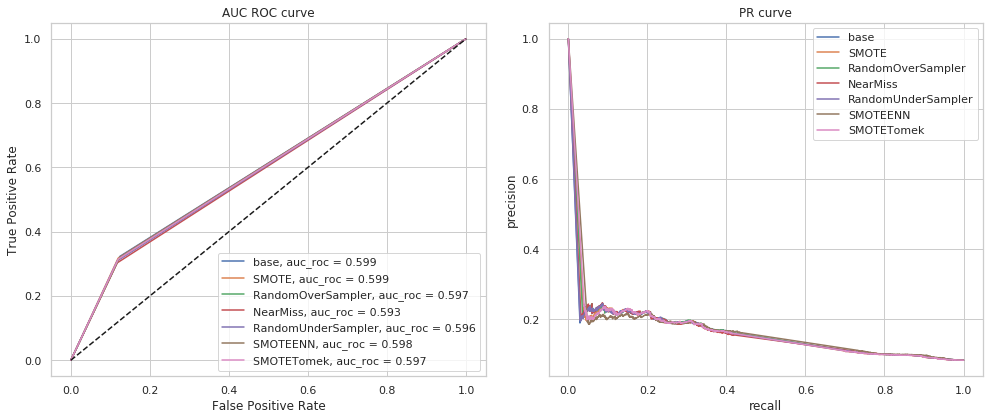

,Sampling Type,f1,precision,recall,accuracy,auc_roc,auc_pr,confusion_matrix
0,base,0.240437,0.191607,0.322667,0.830130,0.599462,0.103164,"[[7230, 1021], [508, 242]]"
1,SMOTE,0.241013,0.194286,0.317333,0.833463,0.598856,0.082835,"[[7264, 987], [512, 238]]"
2,RandomOverSampler,0.237903,0.191248,0.314667,0.832019,0.596856,0.093031,"[[7253, 998], [514, 236]]"
3,NearMiss,0.233659,0.190277,0.302667,0.834574,0.592795,0.102031,"[[7285, 966], [523, 227]]"
4,RandomUnderSampler,0.237583,0.192851,0.309333,0.834574,0.595825,0.102354,"[[7280, 971], [518, 232]]"
5,SMOTEENN,0.238850,0.190063,0.321333,0.829352,0.598432,0.126512,"[[7224, 1027], [509, 241]]"
6,SMOTETomek,0.238746,0.192339,0.314667,0.832796,0.597280,0.084242,"[[7260, 991], [514, 236]]"


In [208]:
# Get Different Sampling Results

sampling_results = get_different_sampling_type_results('SVM', X_test_pca)

# Tabulate results
sampling_results

### Obeservation:

For SVM, SmoteTomek Performs better than other sampling techniques. With Hypertuned, we got:

| f1 | precision | recall | accuracy | auc_roc | auc_pr | confusion_matrix |
| --- | --- | --- | --- | --- | --- | --- |
| 0.228216 | 0.176849 | 0.321637 | 0.833706 | 0.598863 | 0.083913 | [[[7240, 1024], [464, 220]] |

**The score is still not very good. Let's try with other Machine Learning Models and see the result.**

## 4.4 Decision Tree

In [209]:
# Implement SMOTEENN on the whole train Dataset

X_train_resampled, y_train_resampled = implement_smoteenn(X_train, y_train)

(31894, 71)
(31894, 1)


#### Running the Decision Tree Model with default parameters.

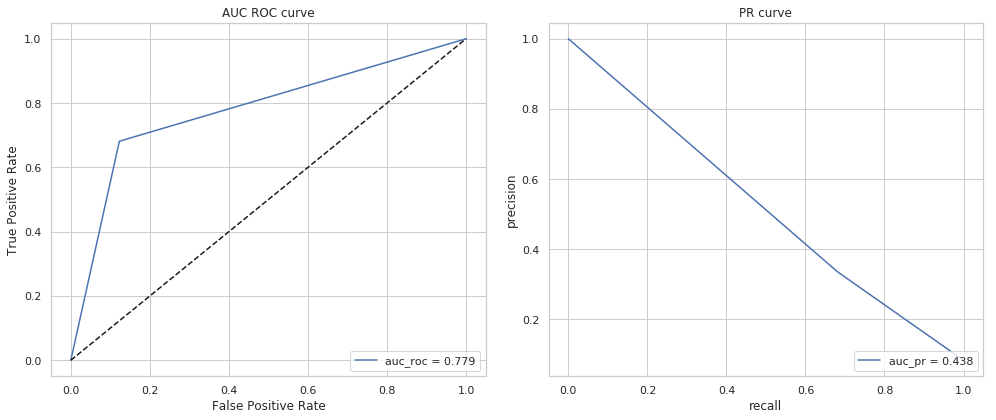

,f1,precision,recall,accuracy,auc_roc,auc_pr,confusion_matrix
0,0.449428,0.335302,0.681333,0.860904,0.77928,0.43827,"[[7238, 1013], [239, 511]]"


In [210]:
# Decision Tree with Default Parameters

tree = DecisionTreeClassifier(random_state = 100)
tree = tree.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []
scores = get_scores(scores, tree, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

**This is the initial output with default parameters. We will now proceed with hypertuning using GridSearch**

### 4.4.1 Decision Tree - HyperTuning

#### Decision Tree - HyperTuning max_depth

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  11 tasks      | elapsed:   23.2s
[Parallel(n_jobs=15)]: Done 145 out of 145 | elapsed:  3.3min finished


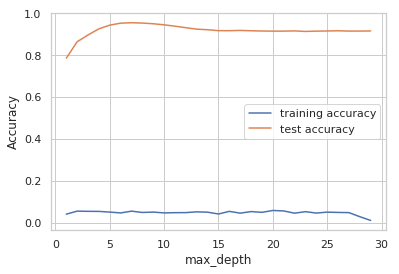

{'max_depth': 7}

In [211]:
# GridSearchCV to find optimal max_depth

tree = DecisionTreeClassifier(random_state = 100)
parameter = 'max_depth'

# parameters to build the model on
param_grid = {parameter: range(1, 30)}
gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', tree)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

#### Decision Tree - HyperTuning min_samples_split

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  11 tasks      | elapsed:   14.8s
[Parallel(n_jobs=15)]: Done 140 out of 140 | elapsed:  1.8min finished


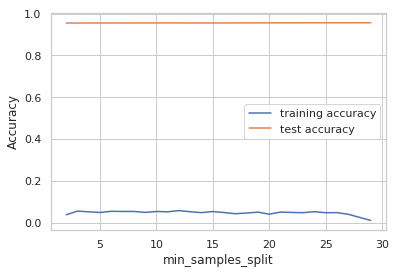

{'min_samples_split': 29}

In [212]:
# GridSearchCV to find optimal min_samples_split

tree = DecisionTreeClassifier(max_depth = 7, random_state = 100)
parameter = 'min_samples_split'

# parameters to build the model on
param_grid = {parameter: range(2, 30)}
gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', tree)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

#### Decision Tree - HyperTuning min_samples_leaf

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  11 tasks      | elapsed:   14.8s
[Parallel(n_jobs=15)]: Done 132 tasks      | elapsed:  1.8min
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:  3.8min finished


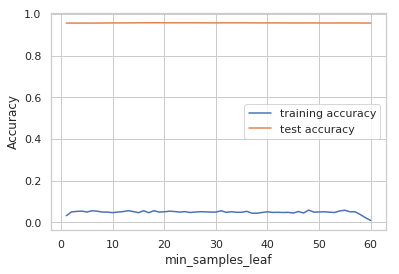

{'min_samples_leaf': 19}

In [213]:
# GridSearchCV to find optimal min_samples_leaf

tree = DecisionTreeClassifier(max_depth = 7, min_samples_split = 26, random_state = 100)
parameter = 'min_samples_leaf'

# parameters to build the model on
param_grid = {parameter: range(1, 61)}
gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', tree)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

#### Running the Decision Tree Model with best parameters obtained from grid search.

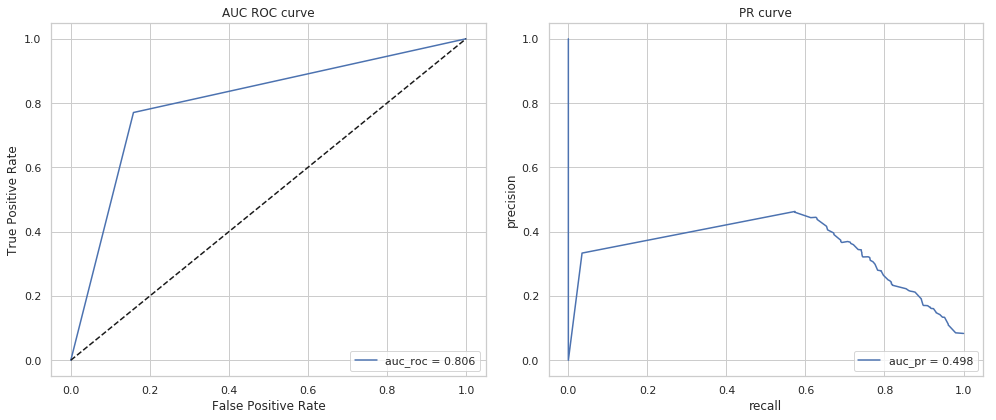

,f1,precision,recall,accuracy,auc_roc,auc_pr,confusion_matrix
0,0.438543,0.306469,0.770667,0.835574,0.80607,0.497709,"[[6943, 1308], [172, 578]]"


In [214]:
# Decision Tree with best parameters obtained from grid search

tree = DecisionTreeClassifier(max_depth = 7, min_samples_split = 26, min_samples_leaf = 46, random_state = 100)
tree = tree.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []
scores = get_scores(scores, tree, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

### Observation:

For Decision Trees:

 - With Default Parameters, we got:

| f1 | precision | recall | accuracy | auc_roc | auc_pr | confusion_matrix |
| --- | --- | --- | --- | --- | --- | --- |
| 0.40718 | 0.290625 | 0.679825 | 0.848681 | 0.771241 | 0.42102 | [[7129, 1135], [219, 465]] |

 - And With HyperTuning, we got:

| f1 | precision | recall | accuracy | auc_roc | auc_pr | confusion_matrix |
| --- | --- | --- | --- | --- | --- | --- |
| 0.424499 | 0.28818 | 0.805556 | 0.833035 | 0.820433 | 0.468412 | [[6903, 1361], [133, 551]] |


**Thus, it shows that there is a significant improvement in f1, precision, recall, accuracy and auc_roc in the final model (After HyperTuning)**

**Note:**

We have used SMOTEENN sampling method for handling the class imbalance. Let's now verify other sampling methods and see if their scores is better than SMOTEENN or not.

In [215]:
# Apply Class Imbalance transformations to dataset

dataset = []
dataset = apply_transformations(dataset, X_train, y_train)

Transforming SMOTE
Transforming RandomOverSampler
Transforming NearMiss
Transforming RandomUnderSampler
Transforming SMOTEENN
Transforming SMOTETomek


Performing base
Performing SMOTE
Performing RandomOverSampler
Performing NearMiss
Performing RandomUnderSampler
Performing SMOTEENN
Performing SMOTETomek
 
Training on base
Training on SMOTE
Training on RandomOverSampler
Training on NearMiss
Training on RandomUnderSampler
Training on SMOTEENN
Training on SMOTETomek


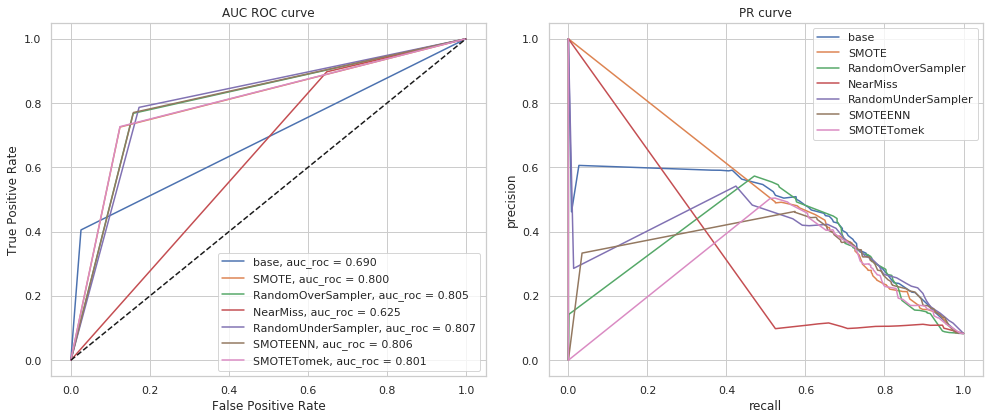

,Sampling Type,f1,precision,recall,accuracy,auc_roc,auc_pr,confusion_matrix
0,base,0.480253,0.589147,0.405333,0.926897,0.689820,0.379024,"[[8039, 212], [446, 304]]"
1,SMOTE,0.468966,0.346497,0.725333,0.863126,0.800492,0.449303,"[[7225, 1026], [206, 544]]"
2,RandomOverSampler,0.438690,0.307036,0.768000,0.836240,0.805222,0.481250,"[[6951, 1300], [174, 576]]"
3,NearMiss,0.198906,0.111850,0.897333,0.397734,0.624827,0.315719,"[[2907, 5344], [77, 673]]"
4,RandomUnderSampler,0.426763,0.292804,0.786667,0.823908,0.806980,0.431519,"[[6826, 1425], [160, 590]]"
5,SMOTEENN,0.438543,0.306469,0.770667,0.835574,0.806070,0.497709,"[[6943, 1308], [172, 578]]"
6,SMOTETomek,0.469625,0.346913,0.726667,0.863237,0.801159,0.492919,"[[7225, 1026], [205, 545]]"


In [216]:
# Get Different Sampling Results

sampling_results = get_different_sampling_type_results('Decision Tree', X_test)

# Tabulate results
sampling_results

### Insight:

**Out of various Sampling methods, RandomOverSampler yields the best one in f1, precision, recall, accuracy and auc_roc**

 - With RandomOverSampler Sampling and Hypertuning, we got:

| f1 | precision | recall | accuracy | auc_roc | auc_pr | confusion_matrix |
| --- | --- | --- | --- | --- | --- | --- |
| 0.441176 | 0.302948 | 0.811404 | 0.842870 | 0.828439 | 0.349764 | [[6987, 1277], [129, 555]] |

<br></br>

**Let's now try with Random Forest to see the result.**


### 4.5 Random Forest

#### Running the Random Forest Model with default parameters.

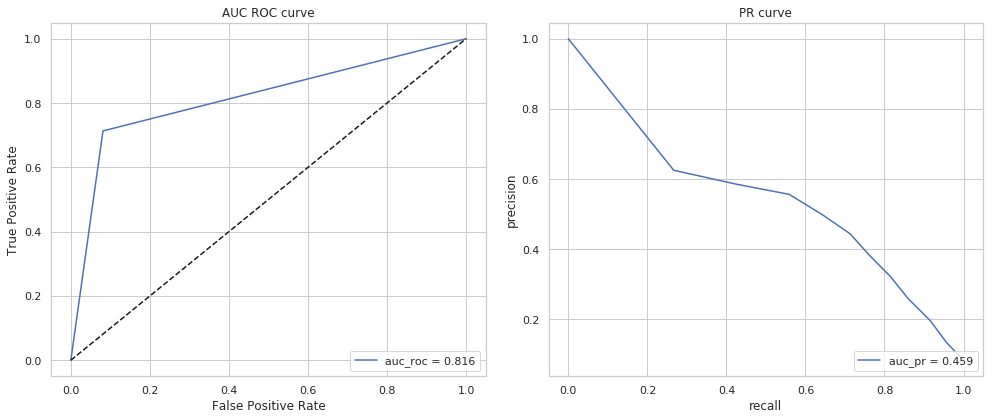

,f1,precision,recall,accuracy,auc_roc,auc_pr,confusion_matrix
0,0.547035,0.443615,0.713333,0.901566,0.816005,0.459067,"[[7580, 671], [215, 535]]"


In [217]:
# Random Forest with Default Parameters

rfc = RandomForestClassifier(n_jobs = -1, random_state = 100)
rfc = rfc.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots

scores = []
scores = get_scores(scores, rfc, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

**This is the initial output with default parameters. We will now proceed with hypertuning using GridSearch**


### 4.5.1 Random Forest - HyperTuning

#### Random Forest - HyperTuning n_estimators

In [ ]:
# GridSearchCV to find optimal n_estimators

rfc = RandomForestClassifier(n_jobs = -1, random_state = 100)
parameter = 'n_estimators'

# parameters to build the model on

param_grid = {parameter: range(100, 1000, 100)}
gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', rfc)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.


#### Random Forest - HyperTuning max_depth

In [ ]:
# GridSearchCV to find optimal max_depth

rfc = RandomForestClassifier(n_estimators = 900, n_jobs = -1, random_state = 100)
parameter = 'max_depth'

# parameters to build the model on
param_grid = {parameter: range(1, 30)}
gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', rfc)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

#### Random Forest - HyperTuning min_samples_split

In [ ]:
# GridSearchCV to find optimal min_samples_split

rfc = RandomForestClassifier(n_estimators = 900, max_depth = 29, n_jobs = -1, random_state = 100)
parameter = 'min_samples_split'

# parameters to build the model on
param_grid = {parameter: range(2, 11, 2)}
gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', rfc)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

#### Random Forest - HyperTuning min_samples_leaf

In [ ]:
# GridSearchCV to find optimal min_samples_leaf

rfc = RandomForestClassifier(n_estimators = 900, max_depth = 29, min_samples_split = 2,
                             n_jobs = -1, random_state = 100)
parameter = 'min_samples_leaf'

# parameters to build the model on
param_grid = {parameter: range(1, 10)}
gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', rfc)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

#### Running the Random Forest Model with best parameters obtained from grid search.

In [ ]:
# Random Forest with best parameters obtained from grid search

rfc = RandomForestClassifier(n_estimators = 900, max_depth = 29, min_samples_split = 2, min_samples_leaf = 1,
                             n_jobs = -1, random_state = 100)
rfc = rfc.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []
scores = get_scores(scores, rfc, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

### Observation:

From Random Forest:

- with Default Parameters:

| f1 | precision | recall | accuracy | auc_roc | auc_pr | confusion_matrix |
| --- | --- | --- | --- | --- | --- | --- |
| 0.516393 | 0.397476 | 0.736842 | 0.894502 | 0.822196 | 0.458987 | [[7500, 764], [180, 504]] |

- with HyperTuning:

| f1 | precision | recall | accuracy | auc_roc | auc_pr | confusion_matrix |
| --- | --- | --- | --- | --- | --- | --- |
| 0.531774 | 0.407638 | 0.76462 | 0.897072 | 0.836327 | 0.430897 | [[7504, 760], [161, 523]] |

**Random Forest has a better score than Decision Tree. There is a significant improvement in f1, precision, recall, accuracy and auc_roc in the final model of Random Forest (After HyperTuning)**

**Note:**

We have used SMOTEENN sampling method for handling the class imbalance. Let's now verify other sampling methods and see if their scores is better than SMOTEENN or not.

In [ ]:
# Get Different Sampling Results

sampling_results = get_different_sampling_type_results('Random Forest', X_test)

# Tabulate results
sampling_results

**Out of various Sampling methods, RandomOverSampler yields the best one in f1, precision, recall and accuracy**

With RandomOverSampler Sampling and Hypertuning, we got:

| f1 | precision | recall | accuracy | auc_roc | auc_pr | confusion_matrix |
| --- | --- | --- | --- | --- | --- | --- |
| 0.577710 | 0.600000 | 0.557018 | 0.937751 | 0.763141 | 0.523131 | [8010, 254], [303, 381]] |



## 4.6 Adaboost

#### Running the Adaboost Classifier with default parameters.

In [ ]:
# Adaboost with Default Parameters

tree = DecisionTreeClassifier(max_depth = 8, min_samples_split = 9, min_samples_leaf = 29, random_state = 100)
abc = AdaBoostClassifier(base_estimator = tree, random_state = 100)
abc = abc.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []
scores = get_scores(scores, abc, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

**This is the initial output with default parameters. We will now proceed with hypertuning using GridSearch**

### 4.6.1 Adaboost - HyperTuning

#### Adaboost - HyperTuning n_estimators

In [ ]:
# GridSearchCV to find best n_estimators

tree = DecisionTreeClassifier(max_depth = 8, min_samples_split = 9, min_samples_leaf = 29, random_state = 100)
abc = AdaBoostClassifier(base_estimator = tree, random_state = 100)
parameter = 'n_estimators'
param_grid = {parameter: range(600, 1100, 100)}
gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', abc)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

#### Adaboost - HyperTuning learning_rate

In [ ]:
# GridSearchCV to find best learning_rate

tree = DecisionTreeClassifier(max_depth = 8, min_samples_split = 9, min_samples_leaf = 29, random_state = 100)
abc = AdaBoostClassifier(base_estimator = tree, n_estimators = 1000, random_state = 100)
parameter = 'learning_rate'
param_grid = {parameter: np.arange(0.1, 1.1, 0.1)}
gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', abc)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

#### Running the Adaboost Model with best parameters obtained from grid search.

In [ ]:
# AdaBoost with best parameters obtained from grid search

tree = DecisionTreeClassifier(max_depth = 8, min_samples_split = 9, min_samples_leaf = 29, random_state = 100)
abc = AdaBoostClassifier(base_estimator = tree, n_estimators = 1000, learning_rate = 0.9, random_state = 100)
abc = abc.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []
scores = get_scores(scores, abc, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

### Interpretation:

From Adaboost:

- with Default Parameters:

| f1 | precision | recall | accuracy | auc_roc | auc_pr | confusion_matrix |
| --- | --- | --- | --- | --- | --- | --- |
| 0.510593 | 0.400332 | 0.704678 | 0.896737 | 0.808656 | 0.37067 | [[7542, 722], [202, 482]] |

- with HyperTuning:

| f1 | precision | recall | accuracy | auc_roc | auc_pr | confusion_matrix |
| --- | --- | --- | --- | --- | --- | --- |
| 0.56264 | 0.455616 | 0.73538 | 0.912606 | 0.831328 | 0.468855 | [[7663, 601], [181, 503]] |

**There is a significant improvement in f1, precision, recall, accuracy and auc_roc in the final model of Adaboost (After HyperTuning)**

**Note:**

We have used SMOTEENN sampling method for handling the class imbalance. Let's now verify other sampling methods and see if their scores is better than SMOTEENN or not.

In [ ]:
# Get Different Sampling Results

sampling_results = get_different_sampling_type_results('Adaboost', X_test)

# Tabulate results
sampling_results

**Out of various Sampling methods, SMOTEENN yields the best one in f1, precision, recall and accuracy**

With RandomOverSampler Sampling and Hypertuning, we got:

| f1 | precision | recall | accuracy | auc_roc | auc_pr | confusion_matrix |
| --- | --- | --- | --- | --- | --- | --- |
| 0.577710 | 0.600000 | 0.557018 | 0.937751 | 0.763141 | 0.523131 | [8010, 254], [303, 381]] |

### 4.8 LightGBM

#### Running the LightGBM Classifier with default parameters.

In [ ]:
# LightGBM with Default Parameters

lgb = LGBMClassifier(objective = 'binary', n_jobs = -1, random_state = 100)
lgb = lgb.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots

scores = []
scores = get_scores(scores, lgb, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

**This is the initial output with default parameters. We will now proceed with hypertuning using GridSearch**

### 4.7.1 LightGBM - HyperTuning

#### LightGBM - HyperTuning num_leaves

In [ ]:
# GridSearchCV to find optimal num_leaves

lgb = LGBMClassifier(objective = 'binary', n_jobs = -1, random_state = 100)
parameter = 'num_leaves'
param_grid = {parameter: range(20, 72)}
gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lgb)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

#### LightGBM - HyperTuning max_depth

In [ ]:
# GridSearchCV to find optimal max_depth

lgb = LGBMClassifier(num_leaves = 70, objective = 'binary', n_jobs = -1, random_state = 100)
parameter = 'max_depth'
param_grid = {parameter: range(8, 72)}
gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lgb)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

#### LightGBM - HyperTuning learning_rate

In [ ]:
# GridSearchCV to find optimal learning_rate

lgb = LGBMClassifier(num_leaves = 70, max_depth = 29, objective = 'binary', n_jobs = -1, random_state = 100)
parameter = 'learning_rate'
param_grid = {parameter: np.arange(0.1, 1.1, 0.1)}
gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lgb)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

#### LightGBM - HyperTuning n_estimators

In [ ]:
# GridSearchCV to find optimal n_estimators

lgb = LGBMClassifier(num_leaves = 70, max_depth = 29, learning_rate = 0.5, objective = 'binary',
                     n_jobs = -1, random_state = 100)
parameter = 'n_estimators'
param_grid = {parameter: range(100, 1100, 100)}
gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lgb)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

#### LightGBM - HyperTuning min_child_samples

In [ ]:
# GridSearchCV to find optimal min_child_samples

lgb = LGBMClassifier(num_leaves = 70, max_depth = 29, learning_rate = 0.5, n_estimators = 600,
                     objective = 'binary', n_jobs = -1, random_state = 100)
parameter = 'min_child_samples'
param_grid = {parameter: range(1, 26)}
gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lgb)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

#### LightGBM - HyperTuning subsample

In [ ]:
# GridSearchCV to find optimal subsample: 

lgb = LGBMClassifier(num_leaves = 70, max_depth = 29, learning_rate = 0.5, n_estimators = 600, min_child_samples = 20,
                     objective = 'binary', n_jobs = -1, random_state = 100)
parameter = 'subsample'
param_grid = {parameter: np.arange(0.1, 1.1, 0.1)}
gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lgb)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

#### LightGBM - HyperTuning colsample_bytree

In [ ]:
# GridSearchCV to find optimal colsample_bytree: 

lgb = LGBMClassifier(num_leaves = 70, max_depth = 29, learning_rate = 0.5, n_estimators = 600, min_child_samples = 20,
                     subsample = 0.1, objective = 'binary', n_jobs = -1, random_state = 100)
parameter = 'colsample_bytree'
param_grid = {parameter: np.arange(0.1, 1.1, 0.1)}
gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lgb)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

#### Running the LightGBM with best parameters obtained from grid search.

In [ ]:
# LightGBM with best parameters obtained from grid search

lgb = LGBMClassifier(num_leaves = 70, max_depth = 29, learning_rate = 0.5, n_estimators = 600, min_child_samples = 20,
                     subsample = 0.1, colsample_bytree = 1, objective = 'binary', n_jobs = -1, random_state = 100)
lgb = lgb.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots

scores = []
scores = get_scores(scores, lgb, X_test)

# Tabulate results

sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

#### Inference:

From LightGBM:

- with Default Parameters:

| f1 | precision | recall | accuracy | auc_roc | auc_pr | confusion_matrix |
| --- | --- | --- | --- | --- | --- | --- |
| 0.577328 | 0.450362 | 0.803991 | 0.887858 | 0.850339 | 0.513686 | [[7256, 836], [167, 685]] |

- with HyperTuning:

| f1 | precision | recall | accuracy | auc_roc | auc_pr | confusion_matrix |
| --- | --- | --- | --- | --- | --- | --- |
| 0.609558 | 0.494876 | 0.793427 | 0.903175 | 0.854079 | 0.480946 | [[7402, 690], [176, 676]] |

**There is a significant improvement in f1, precision, recall, accuracy and auc_roc in the final model of LightGBM (After HyperTuning).**

**Note:**

We have used SMOTEENN sampling method for handling the class imbalance.

In [ ]:
# Get Different Sampling Results

sampling_results = get_different_sampling_type_results('LightGBM', X_test)

# Tabulate results

sampling_results

### Inference:

**Out of various Sampling methods, RandomOverSampler yields the best one in f1, precision, recall and accuracy and auc_roc**

 - With RandomOverSampler Sampling and Hypertuning, we got:
 

| f1 | precision | recall | accuracy | auc_roc | auc_pr | confusion_matrix |
| --- | --- | --- | --- | --- | --- | --- |
| 0.568236 | 0.625659 | 0.520468 | 0.939540 | 0.747347 | 0.495330 | [[8051, 213], [328, 356]] |

#### <font color = IndianRed>The model with RandomOverSampler sampling technique has a high precision and recall score with accuracy of 93.95%. This model is the best model till now and good to accept.</font>

**Let's apply the RandomOverSampler to get the Feature Importance**

In [ ]:
# Sampling through RandomOverSampler

sampling = RandomOverSampler(random_state = 100)
X_train_resampled, y_train_resampled = sampling.fit_sample(X_train.values, y_train.values.ravel())

# Shuffle the data

perms = np.random.permutation(X_train_resampled.shape[0])
X_train_resampled = X_train_resampled[perms]
y_train_resampled = y_train_resampled[perms]
X_train_resampled = pd.DataFrame(data = X_train_resampled)
y_train_resampled = pd.DataFrame(data = y_train_resampled)

print(X_train_resampled.shape)
print(y_train_resampled.shape)

In [ ]:
# Running LightGBM with RandomOverSampler Technique to get the final model scores.

lgb = LGBMClassifier(num_leaves = 70, max_depth = 29, learning_rate = 0.5, n_estimators = 600, min_child_samples = 20,
                     subsample = 0.1, colsample_bytree = 1, objective = 'binary', n_jobs = -1, random_state = 100)
lgb = lgb.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots

scores = []
scores = get_scores(scores, lgb, X_test)

# Tabulate results

sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

### Important Features:

In [ ]:
feature_importances = pd.DataFrame(lgb.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

In [ ]:
# Plotting the features

plt.figure(figsize=(20, 19))
sns.barplot(x = "importance",
            y = feature_importances.index,
            data = feature_importances.sort_values(by = "importance", ascending = False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

# 5 - Final Inference

The telecom churn analysis is required to predict the customer churn behavior i.e., if a particular customer is likely to churn or not churn. As the problem preview said - 

***"In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition."***

Thus to predict or analyse the behavior of a customer over a time period of good phase and the action phase we created about 4 predictive models as mentioned below -  

1. Logistic Regression Model.
2. Support Vector Machine.
3. Decision Tree Classifier.
4. Random Forest Classifier.

The above models were initially created with default parameters which did not give accurate results and the score metrics were not good. Then we hypertuned each model and recreated them with the **best estimators**. The hyper tuned model showed an increase in the classification scores though marginally. These scores were still not good enough to say the model were good enough.

***Each of the above models were assessed on area under the curve, precision, recall.***

These models did not fare that well and were not able to classify accurately.

We then applied the following **Boosting mechanisms**.

1. AdaBoostClassifier.
2. Extreme Gradient Boosting with XGBoost.
3. Light Gradient Boosting Machine with LightGBM.

The above boosting models were initially created with default parameters which performed better than any of the logistic regression model , SVM model, the decision tree or the random forest classifier. The classification scores and metrics shoot up very high. 

We then hypertuned each boosting model and recreated them with the **best estimators**. The hyper tuned model again performed better that their default counterpart. There was an increase in the classification scores.

### 5.1 Winner

Out of all the above models, **Light Gradient Boosting Machine with LightGBM** with RandomOverSampler Technique came out as the winner giving the best metrics of scores. Let's see the summary of scores for LightGBM model and how it performed.

### 5.2 Summary of Scores
 
### 5.2.1 LightGBM - Default v/s Hypertuned Model

- with RandomOverSampling Technique:

| f1 | precision | recall | accuracy | auc_roc | auc_pr | confusion_matrix |
| --- | --- | --- | --- | --- | --- | --- |
| 0.568236 | 0.625659 | 0.520468 | 0.93954 | 0.747347 | 0.49533 | [[8051, 213], [328, 356]] |

**There is a significant improvement in f1, precision, recall, accuracy and auc_roc in the final model of LightGBM (After HyperTuning).**


### 5.2.2 Confusion Matrix (Hyper tuned Model)

    [8051  213]
    [328   356]

1. True Negative = 8051
2. False Positive = 213
3. False Negative = 328
4. True Positive = 356

Here, Positve == Churn Case and Negative = Non-Churn Case

### 5.2.3 Top 7 Features affecting churn
- aon	
- loc_ic_mou_action_phase	
-  arpu_action_phase	
- std_ic_mou_action_phase	
- max_rech_amt_action_phase	
- loc_ic_mou_good_phase	
- total_ic_mou_good_phase	

**Action phase features are defined above in the derived features section.**


### 5.2.4 Bottom Line

Our LightGBM model is a decent model. We are able to predict with accuracy of **93.95 %** .

If the goal is to engage and talk to the customers to prevent them from churning, its ok to engage with those who are mistakenly tagged as 'not churned,' as it does not cause any negative problem. It could potentially make them even happier for the extra attention they are getting. This is the kind of model that can surely add a value. 